# Machine Learning Applications: Final Project
---

100489210 | Xin Ying Leong \
100496657 | Adeline Poncet \
100496636 | Blanca Sánchez

In [ ]:
# restart runtime after running this cell
!pip install --no-cache-dir --upgrade numpy scipy gensim
!pip install --no-cache-dir pandas==2.2.2  # Reinstall the required pandas version

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 145.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 143.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 97.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [ ]:
!pip install langid
!pip install contractions
!pip install lxml
!pip install swifter
!pip install compress-fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941171 sha256=33177fedfd382c5e43acb5e18a65d4a562a9f54c27d46757ce655c3b0362514b
  Stored in directory: /root/.cache/pip/wheels/32/6a/b6/b7eb43a6ad55b139c15c5daa29f3707659cfa6944d3c696f5b
Successfully built langid
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16505 sha256=8bba8002a36a995dfed104d5a063a101283c86c4e65fd6815e9a65dc71e6a82f
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter
  Preparing metadata (setup.p

In [ ]:
# Common imports
import numpy as np
import pandas as pd
import zipfile as zp
import seaborn as sns
import matplotlib.pyplot as plt
import os
from bs4 import BeautifulSoup
import re
import ast
import scipy
import swifter

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
# From Spacy Tutorial Notebook (author: Jerónimo Arenas-García)
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

#For fancy table Display
%load_ext google.colab.data_table
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# folder_path = "/content/drive/My Drive/MLA Project/recipes"
folder_path= ('/content/drive/MyDrive/ML Applications/recipes/')
folder_path = "/content/drive/My Drive/3º uni/Machine Learning Applications/recipes/"
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
class IterableCorpus_fromfile:
    def __init__(self, filename):
        self.__filename = filename

    def __iter__(self):
        with open(self.__filename, 'r', encoding='utf-8') as fin:
            for line in fin:
                yield line.strip().split()

In [ ]:
def get_vocabulary_coverage(model, gensim_dict):
    vocab = list(gensim_dict.token2id.keys())
    unknown_words = sorted(list(set(vocab).difference(set(model.key_to_index))))
    unknown_ids = [gensim_dict.token2id[w] for w in unknown_words]
    unknown_count = np.sum([gensim_dict.cfs[idx] for idx in unknown_ids])
    coverage = 1 - unknown_count / gensim_dict.num_pos
    return coverage

In [ ]:
from scipy.sparse import csr_matrix

def get_review_vector(model, review):
    word_vecs = []
    for token in review:
        if token in model.key_to_index:
            word_vecs.append(model[token])
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    else:
        vec = np.mean(word_vecs, axis = 0)
    return vec

## Text Preprocessing

In [ ]:
# reviews_df = pd.read_csv('recipe_reviews.csv').sample(n = 10000, replace = False, random_state = 1)
reviews_df = pd.read_csv('recipes/recipe_reviews.csv')
# reviews_df = pd.read_csv('recipe_reviews.csv')
print(len(reviews_df))
reviews_df.head(5)

111613


recipe_id                            recipe             user  rating  \
0          1  Cheesy Amish Breakfast Casserole  Deborah Schmidt       5   
1          1  Cheesy Amish Breakfast Casserole               SR       5   
2          1  Cheesy Amish Breakfast Casserole    QuickOrzo5381       5   
3          1  Cheesy Amish Breakfast Casserole          imajwru       4   
4          1  Cheesy Amish Breakfast Casserole      Mary Heston       5   

         date  \
0  01/01/2013   
1  11/01/2023   
2  04/16/2023   
3  04/22/2023   
4  01/03/2024   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        review  
0  This has been my go-to recipe for a long time (it was originally posted long ago). It is delicious as it stands, but is so adaptable. I generally cut the recipe in half and make it in an 8x8 or 9x9 pan. I have added, in no particular order, minced jalapenos, a can of drained Rotel tomatoes and chilis, green peppers, red peppers, turkey sausage, hot sausage, bacon, and various cheeses (regular or low-fat), depending on what I have on hand. (Please note: I have never added these all at once; this is a list of possible additions you might have on hand. And if you're halving the recipe and are enthusiastic in your additions, use 5 eggs instead of 4.) Also, I use the packaged southwest-style hash browns in place of the plain hash browns. One suggestion: the only thing I found among the cheeses that I couldn't replace is the cottage cheese. It really is essential for creaminess. The one time I made this without, the casserole was brick-like, edible, but not nearly as good as usual. I often make this on a Sunday morning and cut the leftovers in squares and refrigerate or freeze, to be eaten during the week or later. Thank you for this delicious addition to AllRecipes.  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 It was fabulous!Things I did different:1. I used the crumbled bacon from Costco - still used a pound.2. I used a dozen FRESH eggs -they're a little smaller. I might do it anyway because I like how thick & fluffy it came out.3. After frying the bacon & onion, I added the frozen hashbrowns and browned them as well. I did add butter when frying the hashbrowns so they browned nicely and tasted better.4. Spread the hashbrowns/bacon/onions mixture on the bottom of the baking dish.5. Mixed the eggs and 

Check for empty reviews and remove them.

In [ ]:
print(len(reviews_df[reviews_df['review'].isnull()]))

reviews_df = reviews_df[reviews_df['review'].notna()]

print(len(reviews_df[reviews_df['review'].isnull()]))

714
0


In [ ]:
len(reviews_df)

103007

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import re
import contractions
import langid

def is_english(text):
    # Detect the language of the text
    lang, _ = langid.classify(text)
    return lang == 'en'

# Define the text preprocessing function
def prepare_data(text, wnl, stopwords_list):
    # Ensure we are dealing with strings and that text is in English
    if not isinstance(text, str) or not is_english(text):
        return None
    else:
        # Remove HTML tags
        soup = BeautifulSoup(text, "lxml")
        text = soup.get_text()

        # Remove URLs
        text = re.sub(r'https?://\S+|www\.\S+', '', text)

        # Expand contractions
        wrangled_text = contractions.fix(text)

        # Tokenization
        review_tokens = word_tokenize(wrangled_text)

        # POS tagging
        pos_tags = pos_tag(review_tokens)

        # Initialize the lemmatizer
        lemmatizer = wnl

        lemmatized_tokens = []

        for word, pos in pos_tags:
            # Keep only nouns, verbs, adjectives
            if pos.startswith('NN'):
                pos = 'n'  # Noun
            elif pos.startswith('VB'):
                pos = 'v'  # Verb
            elif pos.startswith('JJ'):
                pos = 'a'  # Adjective
            else:
                # Ignore other POS
                continue

            # Lemmatize the word using the appropriate POS tag
            lemmatized_token = lemmatizer.lemmatize(word, pos)
            lemmatized_tokens.append(lemmatized_token)

        # Lowercasing and filtering non-alphanumeric tokens and digits.
        review_tokens_filtered = [token.lower() for token in lemmatized_tokens if token.isalnum() and not token.isdigit()]

        # Remove stopwords
        exclude_lemmas = ['doe', 'wa']
        clean_review = [token for token in review_tokens_filtered if token not in stopwords_list and token not in exclude_lemmas]

        # Return the cleaned list of tokens
        return clean_review

In [ ]:
stopwords_en = set(stopwords.words('english'))
wnl = WordNetLemmatizer()
custom_stopwords = {'extra', 'without', 'enough', 'would', 'could', 'lot', 'thank', 'thanks', 'also', 'well', 'much', 'many', 'another', 'others', 'though', 'instead'}
combined_stopwords = stopwords_en.union(custom_stopwords)

Apply the method `prepare_data()` to each entry of the `review` column of the dataframe. To improve the processing speed, we use the `swifter` module to parallelize the proccess of several entries across the CPU.

In [ ]:
import swifter

reviews_df['nltk_lemmas'] = reviews_df['review'].swifter.apply(prepare_data, args=(wnl, combined_stopwords))

Pandas Apply:   0%|          | 0/110899 [00:00<?, ?it/s]

<ipython-input-11-55e8ce16b949>:21: MarkupResemblesLocatorWarning: The input passed in on this line looks more like a URL than HTML or XML.

If you meant to use Beautiful Soup to parse the web page found at a certain URL, then something has gone wrong. You should use an Python package like 'requests' to fetch the content behind the URL. Once you have the content as a string, you can feed that string into Beautiful Soup.

However, if you want to parse some data that happens to look like a URL, then nothing has gone wrong: you are using Beautiful Soup correctly, and this warning is spurious and can be filtered. To make this warning go away, run this code before calling the BeautifulSoup constructor:

    from bs4 import MarkupResemblesLocatorWarning
    import warnings

    warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)
    
  soup = BeautifulSoup(text, "lxml")


In [ ]:
# Check results
print('============= Original review =============')
print(reviews_df.iloc[0]['review'], '\n')
print('============= Cleaned review =============')
print(reviews_df.iloc[0]['nltk_lemmas'], '\n')

============= Original review =============
This has been my go-to recipe for a long time (it was originally posted long ago). It is delicious as it stands, but is so adaptable. I generally cut the recipe in half and make it in an 8x8 or 9x9 pan. I have added, in no particular order, minced jalapenos, a can of drained Rotel tomatoes and chilis, green peppers, red peppers, turkey sausage, hot sausage, bacon, and various cheeses (regular or low-fat), depending on what I have on hand. (Please note: I have never added these all at once; this is a list of possible additions you might have on hand. And if you're halving the recipe and are enthusiastic in your additions, use 5 eggs instead of 4.) Also, I use the packaged southwest-style hash browns in place of the plain hash browns. One suggestion: the only thing I found among the cheeses that I couldn't replace is the cottage cheese. It really is essential for creaminess. The one time I made this without, the casserole was brick-like, edible

Drop entries with empty cleaned reviews.

In [ ]:
reviews_df = reviews_df[reviews_df['nltk_lemmas'].notna()]
print("Number of empty cleaned review: ", len(reviews_df[reviews_df['nltk_lemmas'].isnull()]['review']))

Number of empty cleaned review:  0


Save the cleaned reviews to a new `.csv` file.

In [ ]:
# save progress
reviews_df.to_csv("recipe_reviews_clean.csv", index = False, encoding = 'utf-8')

## Text Vectorization

#### Corpus, bigrams, BoW

Run the following cell to start from this section.

In [ ]:
# starting checkpoint
reviews_df = pd.read_csv('recipe_reviews_clean.csv')
reviews_df['nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(ast.literal_eval)
reviews_df['nltk_lemmas'].head(5)

0    [recipe, long, time, post, delicious, stand, adaptable, cut, recipe, half, make, pan, add, particular, order, mince, jalapeno, drained, rotel, tomato, chili, green, pepper, red, pepper, turkey, sausage, hot, sausage, bacon, various, cheese, regular, depend, hand, please, note, add, list, possible, addition, hand, halve, recipe, enthusiastic, addition, use, egg, use, package, hash, brown, place, plain, hash, brown, suggestion, thing, find, cheese, replace, cottage, cheese, essential, creaminess, time, make, casserole, edible, good, usual, make, sunday, morning, cut, leftover, square, refrigerate, freeze, eat, week, delicious, addition, allrecipes]
1                                                                                                                                                                                                                                                                                                                                                                      [fabulous, things, use, crumbled, bacon, costco, use, use, dozen, fresh, egg, little, small, like, thick, fluffy, come, fry, bacon, onion, add, frozen, hashbrowns, brown, add, butter, fry, hashbrowns, brown, taste, spread, mixture, bottom, baking, mixed, egg, cheese, pour, glad, find, recipe, loved]
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              [make, family, year, kid, young, bake, muffin, tin, freeze, breakfast, cupcakes, great, meal, go, busy, school, day]
3                                                                                                                                                                                                                                                                                                                                                                                       [responding, greasiness, issue, best, way, avoid, grease, oven, bake, bacon, degree, minute, love, bacon, crispy, leave, method, cook, every, part, bacon, grease, cook, release, put, remove, oven, place, bacon, paper, towel, crumble, never, cook, stove, oven, bake, perfection, cook]
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  [make, recipe, several, year, use, ground, sausage, bacon, simply, potatoes, hashbrowns, use, shredded, parmesan, mozzarella, cheddar, cheese, family, favorite]
Name: nltk_lemmas, dtype: object

In [ ]:
import gensim
from gensim.models.phrases import Phrases
from gensim.corpora import Dictionary

Generate n-grams and update the `corpus`.

In [ ]:
corpus = reviews_df['nltk_lemmas'].values.tolist()
phrases = Phrases(corpus, min_count = 25, threshold = 40)
corpus = [token for token in phrases[corpus]]
reviews_df['nltk_phrases'] = corpus
ngrams = list(phrases.export_phrases())
print(ngrams)

['hash_brown', 'cottage_cheese', 'muffin_tin', 'bacon_grease', 'paper_towel', 'smoked_paprika', 'charcoal_grill', 'swiss_cheese', 'aluminum_foil', 'christmas_morning', 'light_fluffy', 'crock_pot', 'crowd_pleaser', 'huge_fan', 'huge_hit', 'big_hit', 'christmas_eve', 'gluten_free', 'trader_joe', 'read_review', 'low_carb', 'last_night', 'year_old', 'cover_foil', 'sour_cream', 'low_sodium', 'picky_eater', 'heavy_cream', 'dice_tomato', 'huge_success', 'slow_cooker', 'grate_parmesan', 'bacon_dripping', 'plain_yogurt', 'comfort_food', 'greek_yogurt', 'get_rid', 'personal_preference', 'cole_slaw', 'cider_vinegar', 'let_sit', 'apple_cider', 'sesame_seed', 'olive_oil', 'slotted_spoon', 'balsamic_vinegar', 'wine_vinegar', 'mason_jar', 'staple_house', 'rave_review', 'pulled_pork', 'canola_oil', 'miracle_whip', 'pot_luck', 'food_processor', 'virgin_olive', 'lime_juice', 'store_buy', 'equal_part', 'mother_law', 'definite_keeper', 'caraway_seed', 'fit_bill', 'granny_smith', 'smith_apple', 'dried_cran

We have obtained a large number of very interesting bigrams.

Create a Gensim dictionary with the updatd `corpus`.

In [ ]:
from gensim.corpora import Dictionary

D = Dictionary(corpus)
D.filter_extremes(no_below = 20, no_above = 0.80)
vocab = list(D.token2id.keys())
print(len(vocab))

4041


In [ ]:
Y = reviews_df['rating'].values

Visualize the distribution of token count per review (document).

Average number of tokens per review: 19.05


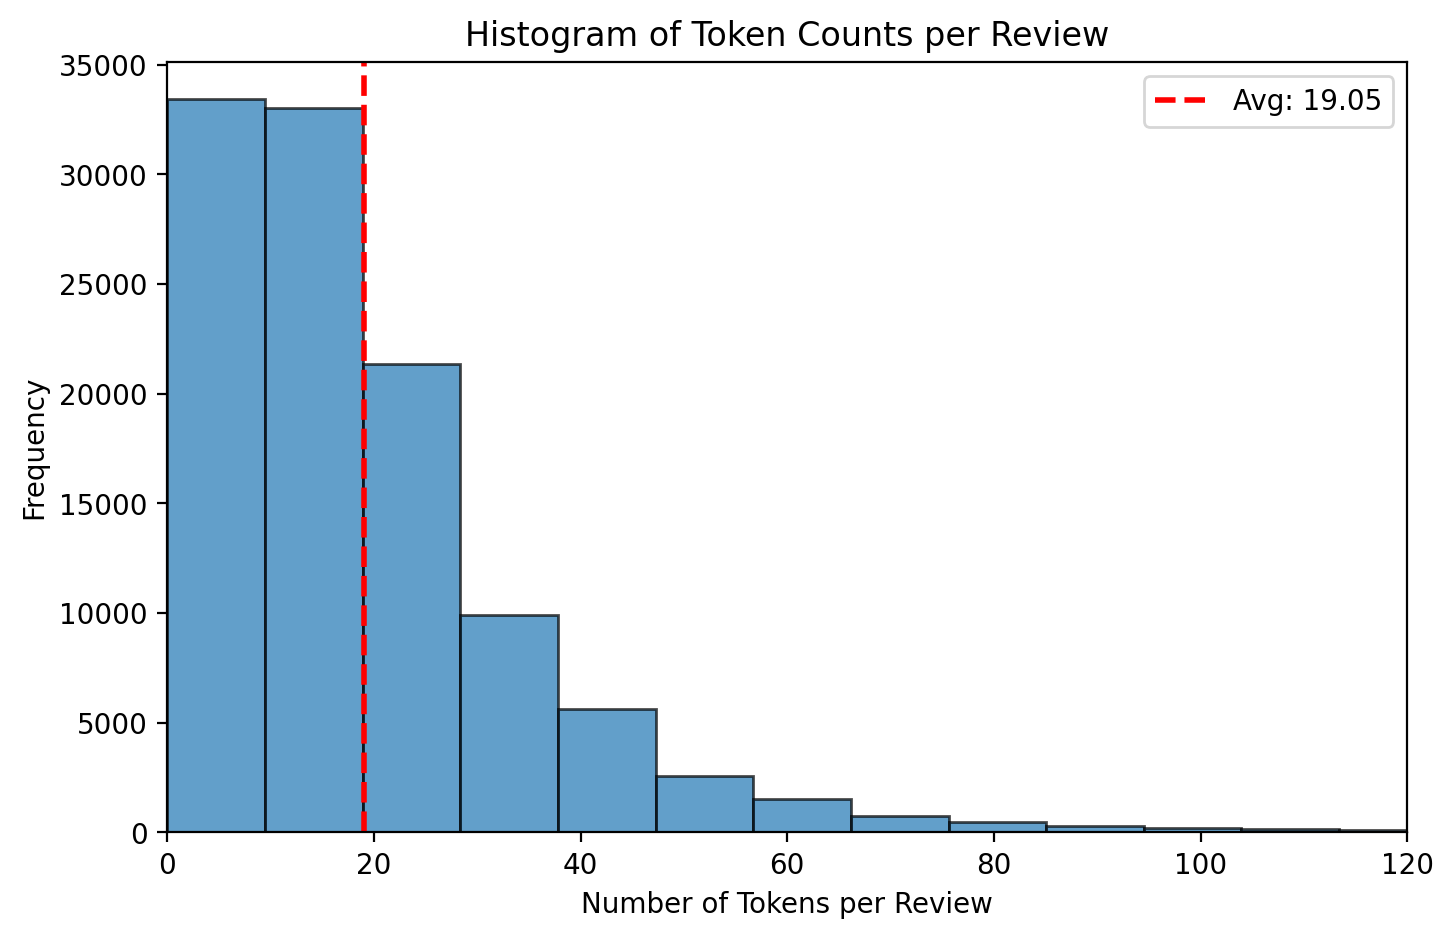

In [ ]:
# Get the number of tokens per document
token_counts = [len(doc) for doc in corpus]

# Compute the average number of tokens per review
avg_tokens = np.mean(token_counts)

# Define x-axis limits (Modify these values as needed)
x_min = 0
x_max = max(token_counts) + 10
x_max_man = 120

plt.figure(figsize=(8, 5))
plt.hist(token_counts, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Number of Tokens per Review")
plt.ylabel("Frequency")
plt.title("Histogram of Token Counts per Review")
plt.axvline(avg_tokens, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {avg_tokens:.2f}')
plt.legend()
plt.xlim(x_min, x_max_man)

print(f"Average number of tokens per review: {avg_tokens:.2f}")

plt.show()

Save the corpus into a text file.

In [ ]:
with open("reviews_corpus.txt", 'w', encoding='utf-8') as fout:
  for element in corpus:
    fout.write(' '.join(element) + '\n')

# Save the Gensim dictionary
D.save("reviews_dictionary.dict")

Or load from the corpus text file using an iterable.

In [ ]:
from gensim.corpora import Dictionary

class IterableCorpus_fromfile:
    def __init__(self, filename):
        self.__filename = filename

    def __iter__(self):
        with open(self.__filename, 'r', encoding='utf-8') as fin:
            for line in fin:
                yield line.strip().split()

MyIterCorpus = IterableCorpus_fromfile('reviews_corpus.txt')
D = Dictionary.load("reviews_dictionary.dict")

n_tokens = len(D)

`MyIterCorpus` is required to create the BOW representation. We can also create a dictionary from it but loading it is much faster.

BOW representation

In [ ]:
# reviews_bow = [D.doc2bow(doc) for doc in corpus]
reviews_bow = [D.doc2bow(doc) for doc in MyIterCorpus]

# Check for one review the result
n_review = 210

print('============= Review =============')
print(reviews_df.loc[n_review, 'review'])

print('\n============= Review (lemmas) =============')
print(' '.join(corpus[n_review]))

print('\n============= Sparse vector representation =============')
print(reviews_bow[n_review])

print('\n============= Word counts for the review =============')
print(list(map(lambda x: (D[x[0]], x[1]), reviews_bow[n_review])))

============= Review =============
It is the best! I bought broccoli slaw and used this dressing recipe.  Had to go back to the store the next day and get another bag. 
I put it in a Mason jar and that 2nd batch only lasted 2 days.  It’s that good…

============= Review (lemmas) =============
best buy broccoli slaw use dress recipe go store next day get bag put mason_jar batch last day

============= Sparse vector representation =============
[(45, 1), (60, 1), (93, 2), (95, 1), (105, 1), (122, 1), (139, 1), (212, 1), (217, 1), (240, 1), (279, 1), (409, 1), (753, 1), (759, 1), (832, 1), (856, 1), (868, 1)]

============= Word counts for the review =============
[('recipe', 1), ('use', 1), ('day', 2), ('go', 1), ('best', 1), ('put', 1), ('broccoli', 1), ('get', 1), ('bag', 1), ('next', 1), ('buy', 1), ('last', 1), ('dress', 1), ('slaw', 1), ('store', 1), ('batch', 1), ('mason_jar', 1)]


TF-IDF representation

In [ ]:
from gensim.models import TfidfModel

tfidf = TfidfModel(reviews_bow)
reviews_tfidf = tfidf[reviews_bow]

print(reviews_tfidf[n_review])

[(45, 0.046431984028711154), (60, 0.061274784449130835), (93, 0.36814806970517333), (95, 0.1472498721752215), (105, 0.1680436842206736), (122, 0.1557659464289315), (139, 0.2585727341372519), (212, 0.14402477686838824), (217, 0.24925566617583506), (240, 0.1286553042547924), (279, 0.2289410056300171), (409, 0.21751486852054303), (753, 0.28331073891576053), (759, 0.35259476362085096), (832, 0.2598077801493435), (856, 0.2265915061556122), (868, 0.44150892241965267)]


In [ ]:
from gensim.corpora import MmCorpus

# Save BOW corpus to disk
MmCorpus.serialize('reviews_corpus.mm', reviews_bow)

Move the large BOW representation from RAM to the disk using `MmCorpus`. Using it improves efficiency for using LDA as it allows reading its contents directly from disk without preprocessing.

#### Word2Vec

In [ ]:
from gensim.models import Word2Vec

# Create an iterator over the sentences in the file, named sentences
# sentences = IterableCorpus_fromfile("reviews_corpus.txt")
# OBS: increase min_count once we have complete dataset
model_word2vec = Word2Vec(sentences = MyIterCorpus, vector_size = 300, window = 5, sg = 1, min_count = 10, seed = 42, workers = 4)

In [ ]:
# Check results
print('============= Word2Vec vocabulary =============')
words = list(model_word2vec.wv.key_to_index)
print(len(words))
print(words[99:130])

============= Word2Vec vocabulary =============
5742
['enjoy', 'dry', 'fantastic', 'whole', 'keep', 'potato', 'simple', 'dinner', 'yummy', 'meal', 'heat', 'share', 'powder', 'amazing', 'roll', 'oven', 'veggie', 'less', 'hand', 'side', 'suggest', 'know', 'beef', 'call', 'substitute', 'food', 'cayenne', 'review', 'broth', 'star', 'mixture']


Save just the word vectors of the Word2Vec model, we don't need the whole model.

In [ ]:
from gensim.models import KeyedVectors
import gc

model_w2v_wv= model_word2vec.wv
model_w2v_wv.save("w2v_mod_recipe_reviews.wordvectors")

del model_w2v_wv
gc.collect()

0

Load a previously saved word vectors of the Word2Vec model.

In [ ]:
from gensim.models import KeyedVectors

model_w2v_wv = KeyedVectors.load("w2v_mod_recipe_reviews.wordvectors", mmap='r')
print(len(model_w2v_wv))

5742


Visualize the most relevant word vectors of the Word2Vec model using TSNE.

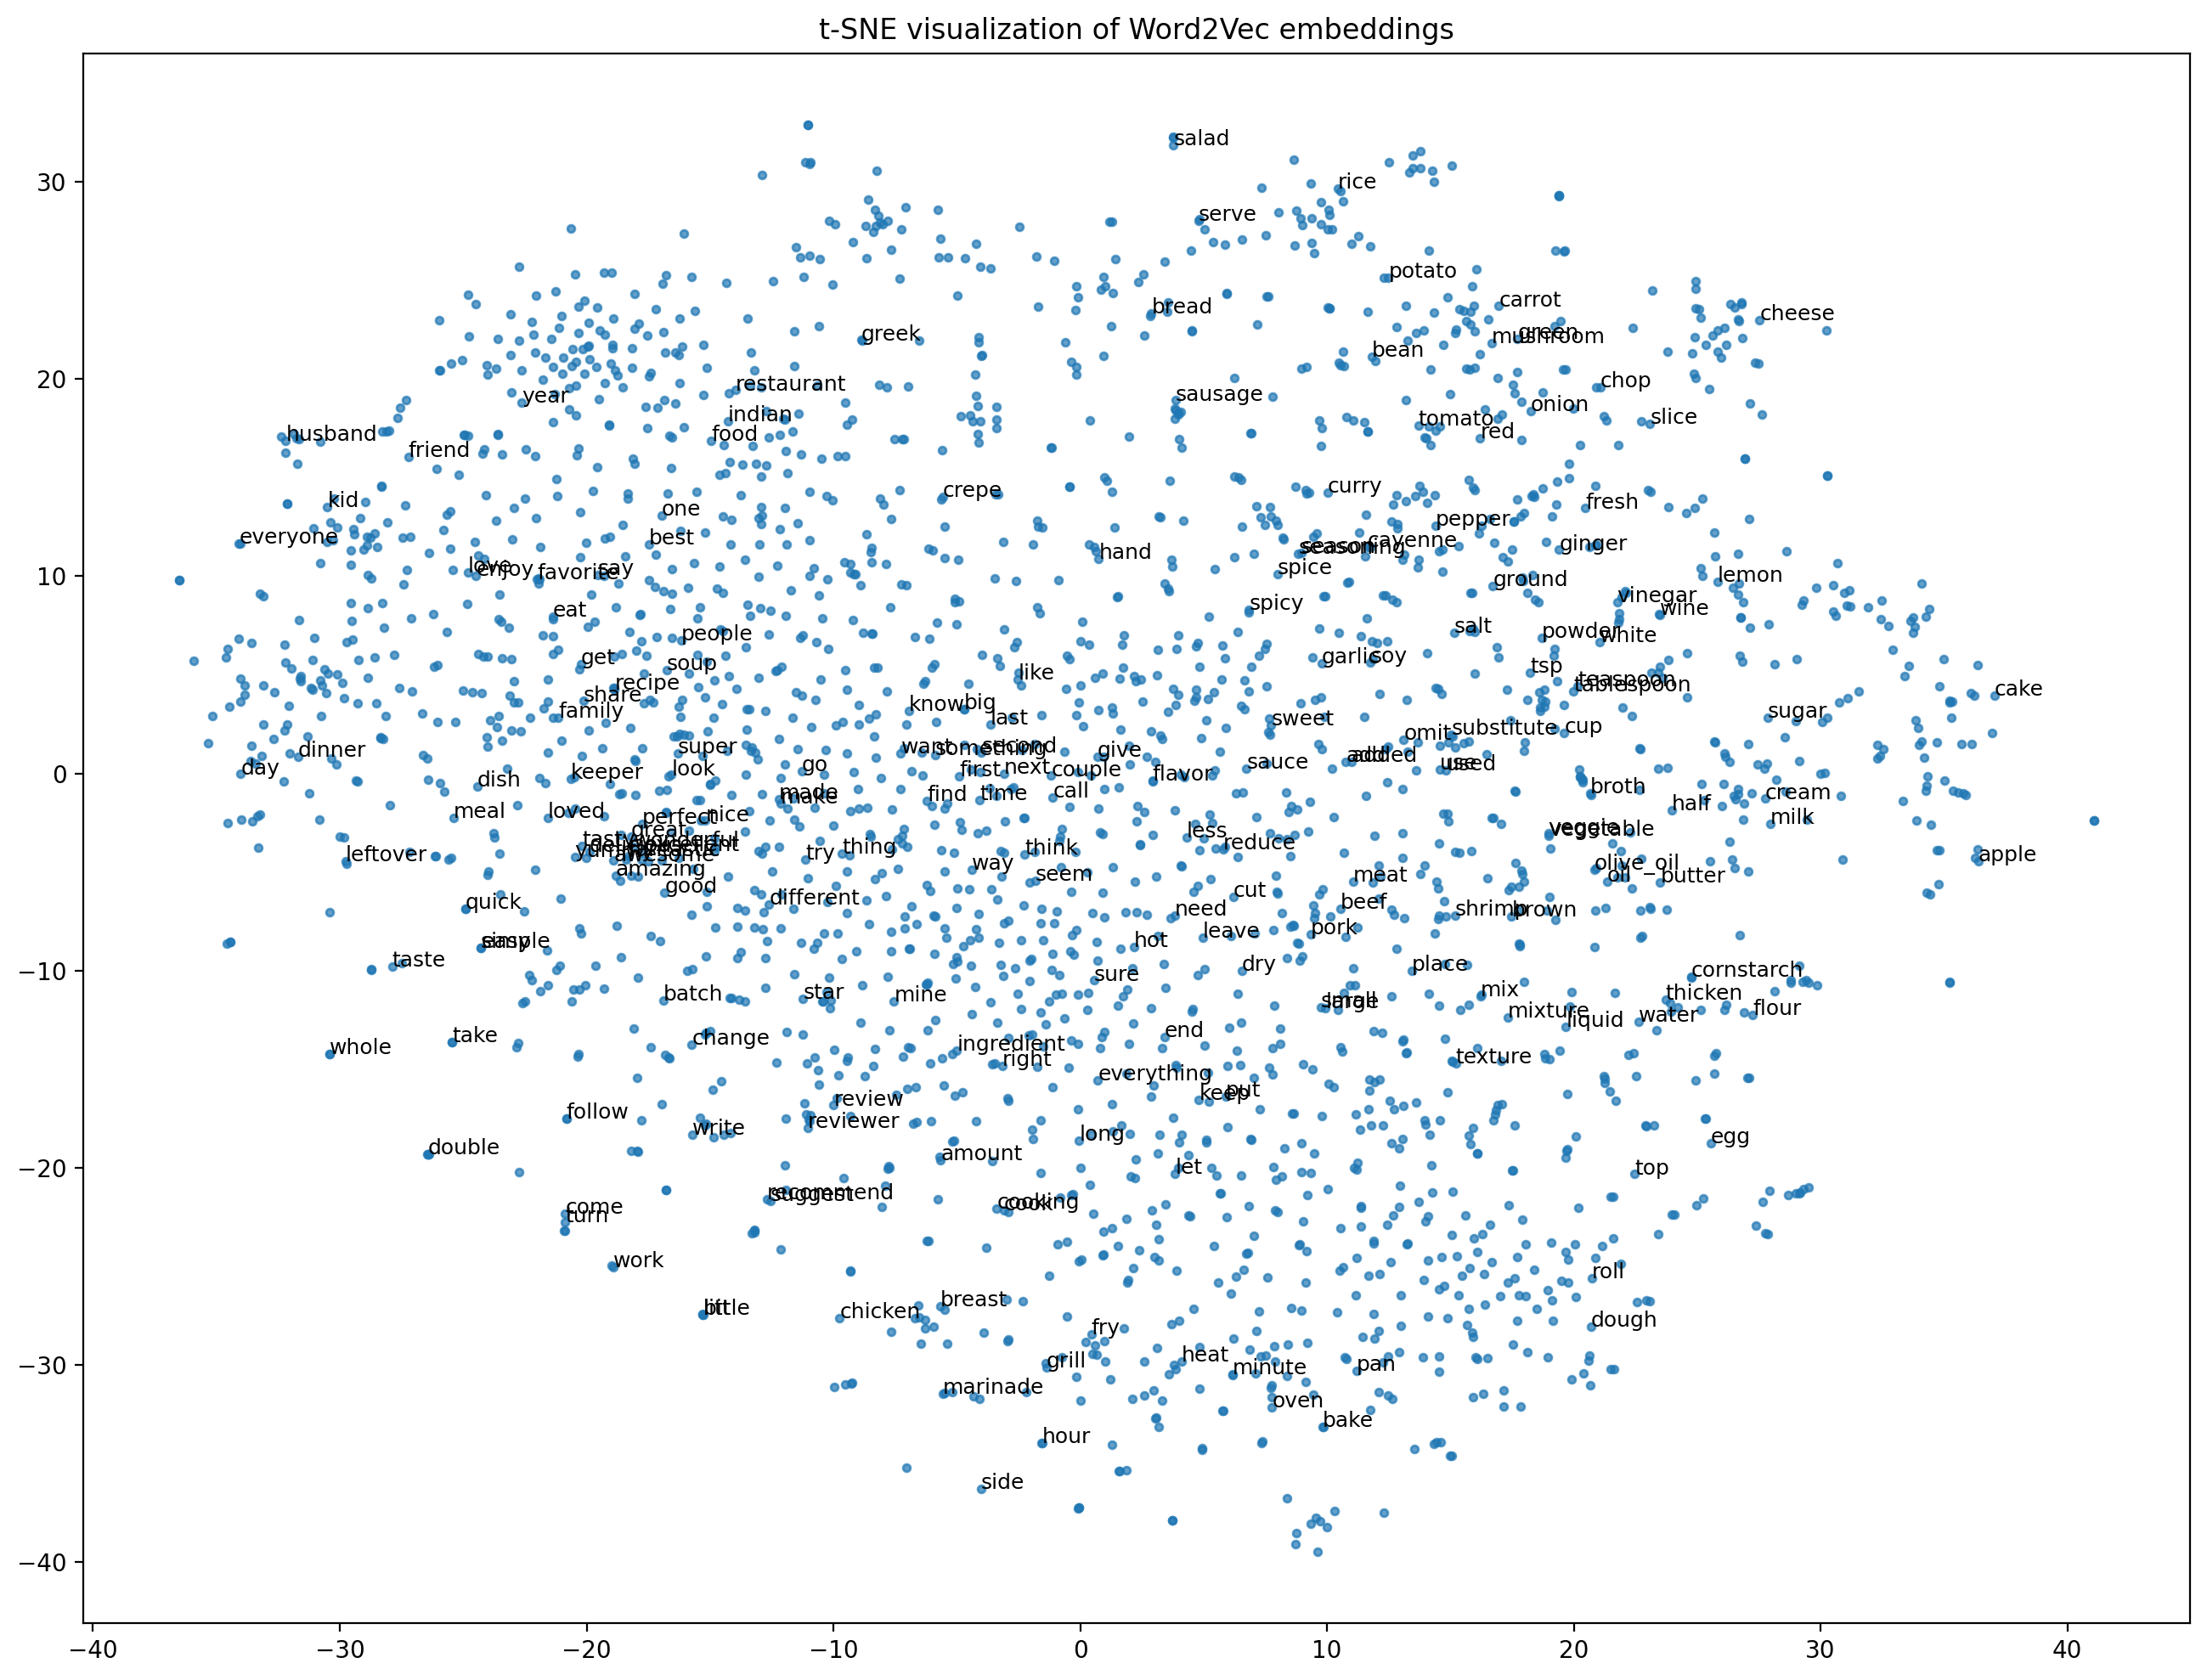

In [ ]:
from sklearn.manifold import TSNE

# Select the more relevant terms of the Word2Vec vocabulary
words = list(model_w2v_wv.index_to_key)[:2500]
word_vectors = np.array([model_w2v_wv[word] for word in words])

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
reduced = tsne.fit_transform(word_vectors)

# Plot
plt.figure(figsize=(16, 12))
plt.scatter(reduced[:, 0], reduced[:, 1], alpha=0.7, s=10)

# Label only some words to avoid cluttering
for i, word in enumerate(words[:200]):
    plt.text(reduced[i, 0], reduced[i, 1], word, fontsize=9)

plt.title("t-SNE visualization of Word2Vec embeddings")
plt.show()

Obtain vocabulary coverage. The following function measures how much of the dictionary's vocabulary is found in the Word2Vec model.

In [ ]:
def get_vocabulary_coverage(model, gensim_dict):
    vocab = list(gensim_dict.token2id.keys())
    unknown_words = sorted(list(set(vocab).difference(set(model.key_to_index))))
    unknown_ids = [gensim_dict.token2id[w] for w in unknown_words]
    unknown_count = np.sum([gensim_dict.cfs[idx] for idx in unknown_ids])
    coverage = 1 - unknown_count / gensim_dict.num_pos
    return coverage

In [ ]:
w2v_coverage = get_vocabulary_coverage(model_w2v_wv, D)
print("Coverage {0:.4f}".format(w2v_coverage))

Coverage 1.0000


We have full coverage, meaning that all of the dictionary's vocabulary is found in the Word2Vec model.

Now convert the clean reviews into Word2Vec embeddings.

In [ ]:
from scipy.sparse import csr_matrix

def get_review_vector(model, review):
    word_vecs = []
    for token in review:
        if token in model.key_to_index:
            word_vecs.append(model[token])
    if len(word_vecs) == 0:
        return np.zeros(model.vector_size)
    else:
        vec = np.mean(word_vecs, axis = 0)
    return vec

In [ ]:
reviews_w2v = np.array(
		reviews_df['nltk_lemmas'].swifter.apply(lambda r: get_review_vector(model_w2v_wv, r)).tolist()
)
reviews_w2v_csr = csr_matrix(reviews_w2v)

Pandas Apply:   0%|          | 0/109550 [00:00<?, ?it/s]

Perform regression using `Ridge` from `sklearn.linear_model` to compare word embeddings of different models. Our goal here it **not** to maximize accuracy but to compare, so a fast model such as `Ridge` is used to save computational time.

In [ ]:
# As our reviews are rated 1-5 stars, there is an implicit value in the order, perform regression.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# param_grid = {'C': np.arange(1, 11, 2), 'kernel': ['linear', 'rbf'], 'epsilon': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0]}

def regression(X, Y, test_size= 0.30):
    """
    X: csr matrix of review vectors
    Y: ratings
    """

    # Split the dataset (70% training, 30% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

    start = time.time()
    ridge = Ridge().fit(X_train, y_train)
    print(f"Fitted in {time.time() - start:.2f} seconds")
    y_pred = ridge.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    test_R2 = r2_score(y_test, y_pred)

    # Display results
    print(f"Test R2: {test_R2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"MAE: {mae:.4f}")

    return test_R2, mse, mae

Create a dictionary that stores results for each word embedding model.

In [ ]:
results = {'Model': [], 'Test R2': [], 'MSE': [], 'MAE': [], 'Coverage': []}

In [ ]:
w2v_R2, w2v_mse, w2v_mae = regression(reviews_w2v_csr, Y)

results['Model'].append('w2v')
results['Test R2'].append(w2v_R2)
results['MSE'].append(w2v_mse)
results['MAE'].append(w2v_mae)
results['Coverage'].append(w2v_coverage)

Fitted in 14.25 seconds
Test R2: 0.2766
MSE: 0.4459
MAE: 0.4782


#### GLoVe

In [ ]:
from gensim import downloader

# list of pretrained models
list(downloader.info()['models'].keys())

['fasttext-wiki-news-subwords-300',
 'conceptnet-numberbatch-17-06-300',
 'word2vec-ruscorpora-300',
 'word2vec-google-news-300',
 'glove-wiki-gigaword-50',
 'glove-wiki-gigaword-100',
 'glove-wiki-gigaword-200',
 'glove-wiki-gigaword-300',
 'glove-twitter-25',
 'glove-twitter-50',
 'glove-twitter-100',
 'glove-twitter-200',
 '__testing_word2vec-matrix-synopsis']

We will use a glove model with an embedding size of 300.

In [ ]:
glove = downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
# Check results
print('============= glove vocabulary =============')
words = list(glove.key_to_index.keys())
print(len(words))
print(words[99:130])

============= glove vocabulary =============
400000
['u.s.', 'so', 'them', 'what', 'him', 'united', 'during', 'before', 'may', 'since', 'many', 'while', 'where', 'states', 'because', 'now', 'city', 'made', 'like', 'between', 'did', 'just', 'national', 'day', 'country', 'under', 'such', 'second', 'then', 'company', 'group']


In [ ]:
glove_coverage = get_vocabulary_coverage(glove, D)
print("Coverage {0:.4f}".format(glove_coverage))

reviews_glove = np.array(
		reviews_df['nltk_lemmas'].swifter.apply(lambda r: get_review_vector(glove, r)).tolist()
)
reviews_glove_csr = csr_matrix(reviews_glove)

Coverage 0.9691


Pandas Apply:   0%|          | 0/109550 [00:00<?, ?it/s]

In [ ]:
glove_R2, glove_mse, glove_mae = regression(reviews_glove_csr, Y)

results['Model'].append('glove')
results['Test R2'].append(glove_R2)
results['MSE'].append(glove_mse)
results['MAE'].append(glove_mae)
results['Coverage'].append(glove_coverage)

Fitted in 14.28 seconds
Test R2: 0.2257
MSE: 0.4773
MAE: 0.4977


#### FastText

In [ ]:
from gensim.models import FastText

model_fasttext = FastText(sentences = MyIterCorpus, vector_size = 300, window = 5, min_count = 20, sg = 1, seed = 42, workers = 4, epochs = 5)

Save the word vectors of the FastText model.

In [ ]:
from gensim.models import KeyedVectors
import gc

fasttext_wv = model_fasttext.wv
fasttext_wv.save("model_fastText.wordvectors")

del model_fasttext
gc.collect()

14550

Load previously saved word vectors of the FastText model.

In [ ]:
from gensim.models import KeyedVectors

fastText_wv = KeyedVectors.load("model_fastText.wordvectors", mmap='r')

In [ ]:
# Check results
print('============= FastText vocabulary =============')
words = list(fasttext_wv.key_to_index)
print(len(words))
print(words[99:130])

============= FastText vocabulary =============
4119
['enjoy', 'dry', 'fantastic', 'whole', 'keep', 'potato', 'simple', 'dinner', 'yummy', 'meal', 'heat', 'share', 'powder', 'amazing', 'roll', 'oven', 'veggie', 'less', 'hand', 'side', 'suggest', 'know', 'beef', 'call', 'substitute', 'food', 'cayenne', 'review', 'broth', 'mixture', 'star']


Visualize the most relevant word vectors of the FastText model using TSNE.

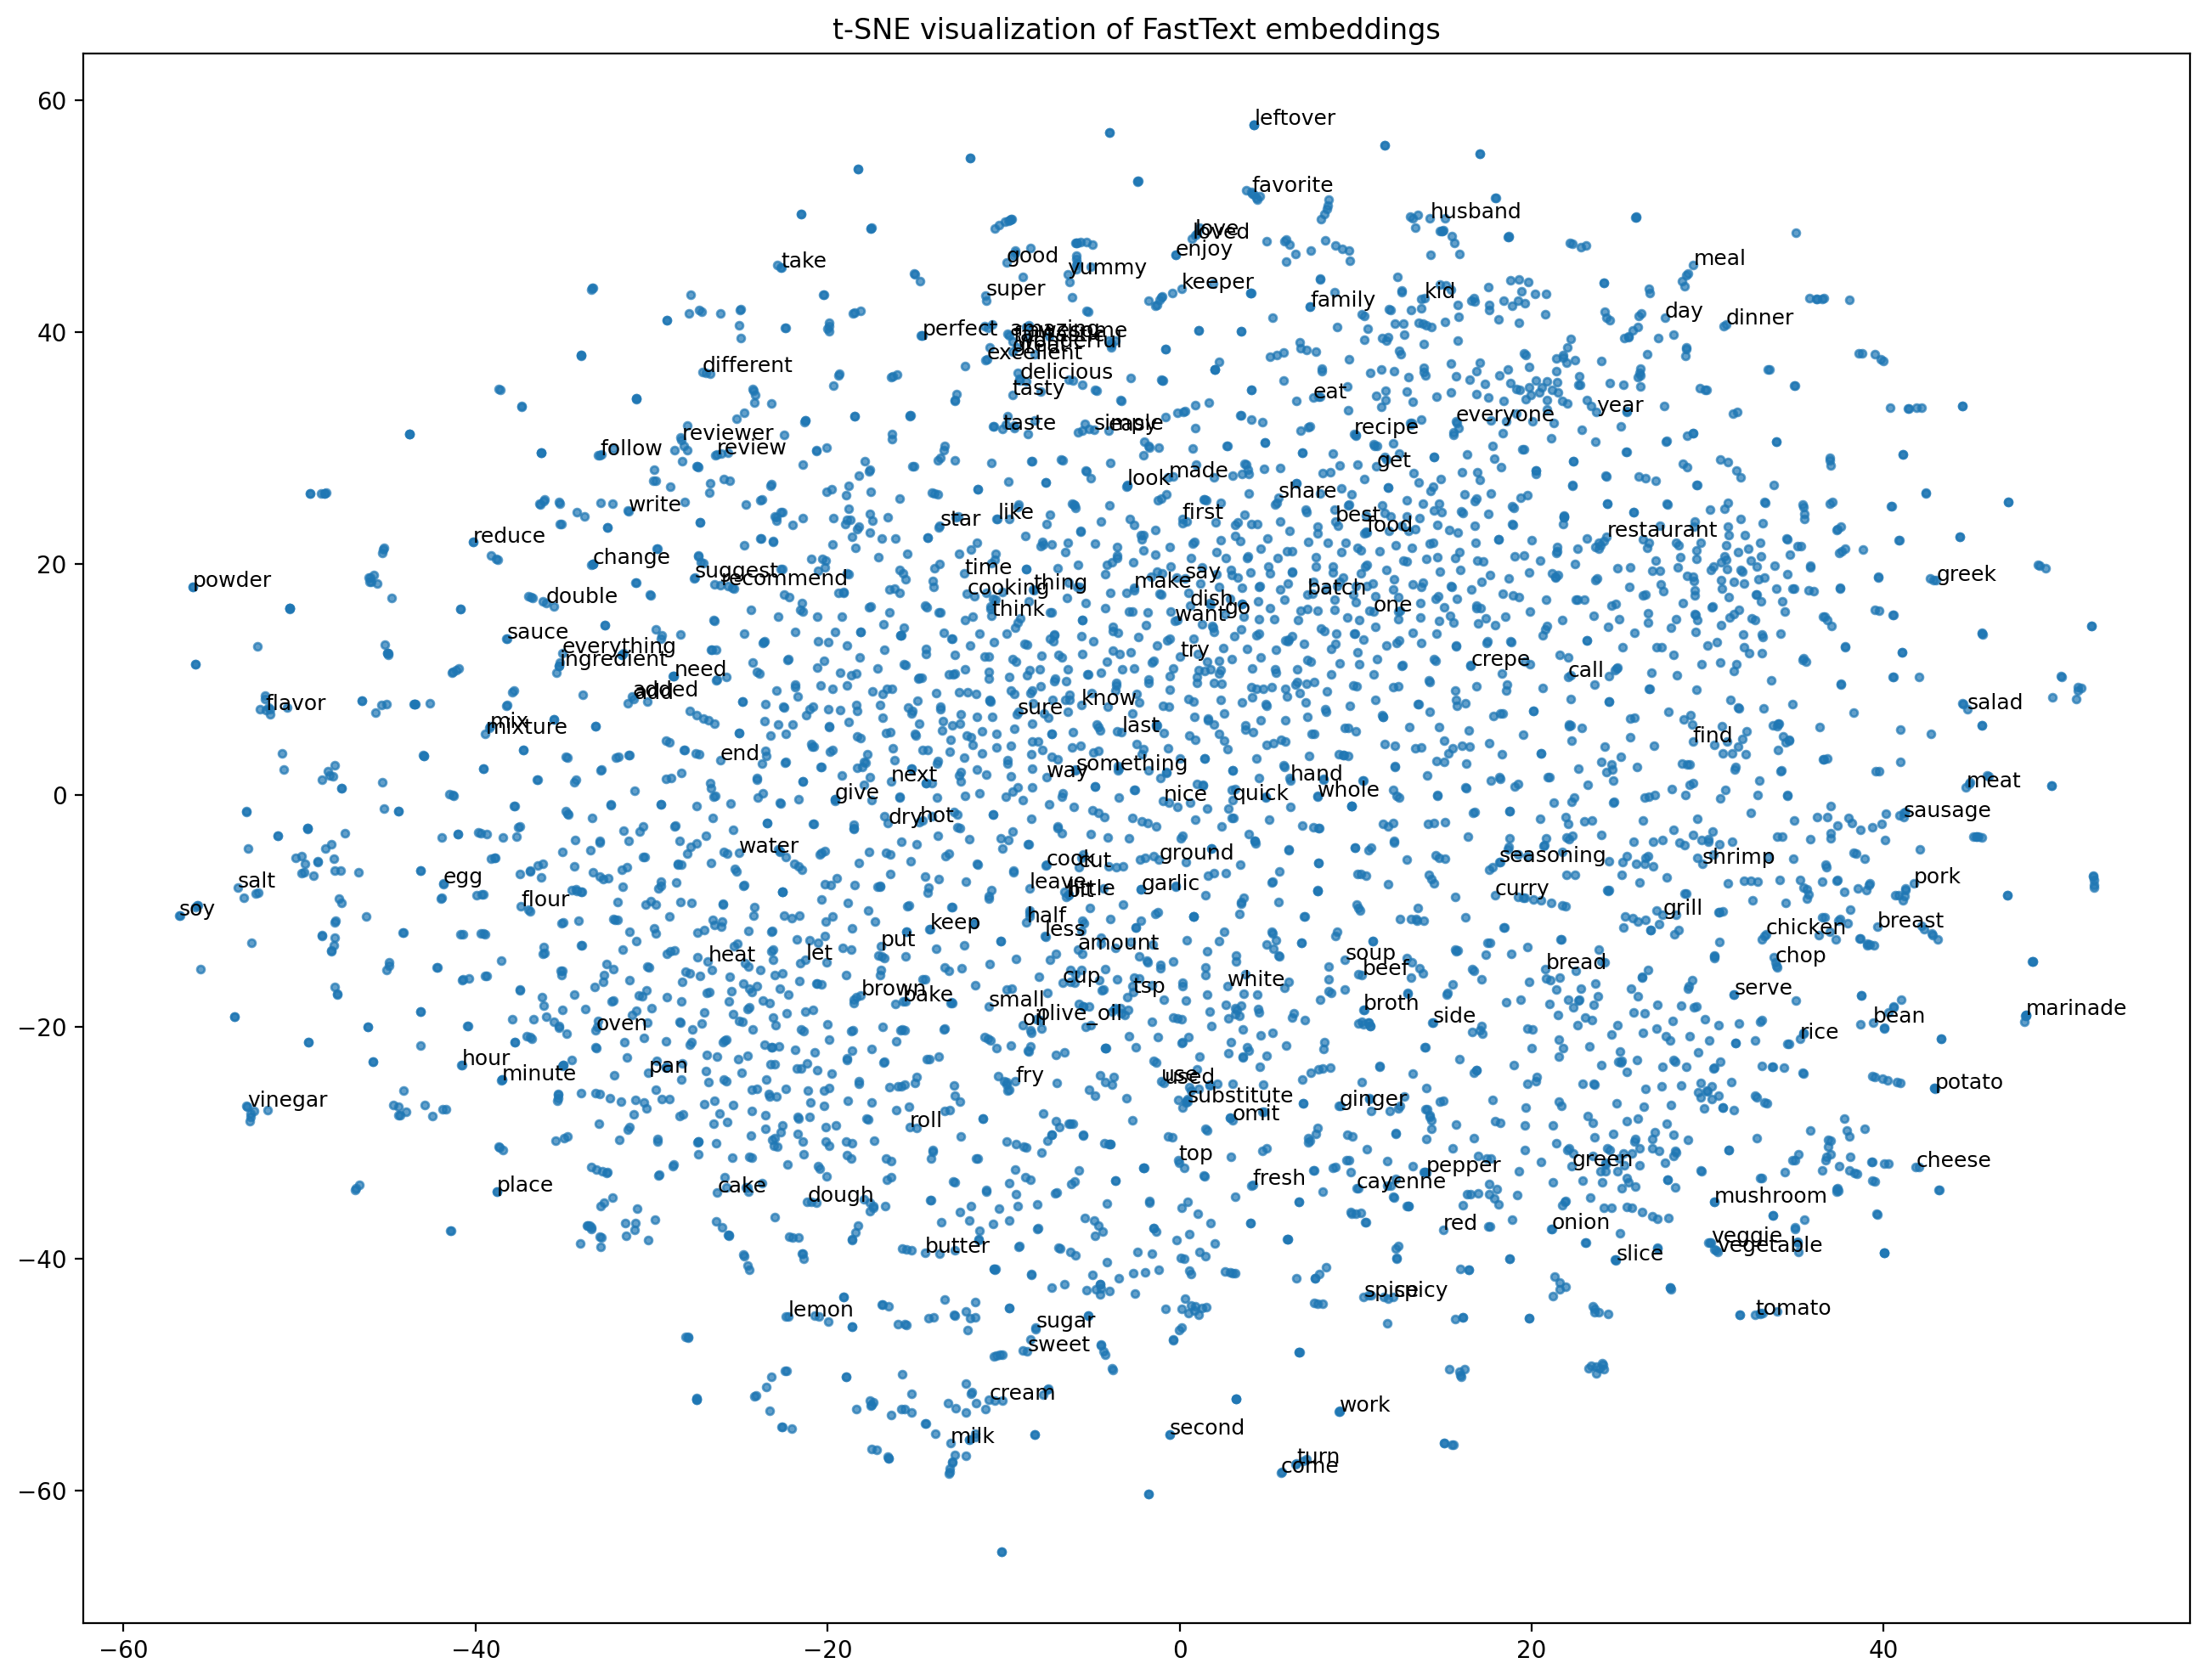

In [ ]:
from sklearn.manifold import TSNE

# Select the more relevant terms of the FastText vocabulary
words_ft = list(fastText_wv.index_to_key)[:2500]
word_vectors_ft = np.array([fastText_wv[word] for word in words])

# Run t-SNE
# Perplexity: parameter that allows
tsne_ft = TSNE(n_components=2, perplexity=50, random_state=42)
reduced_ft = tsne_ft.fit_transform(word_vectors_ft)

# Plot
plt.figure(figsize=(16, 12))
plt.scatter(reduced_ft[:, 0], reduced_ft[:, 1], alpha=0.7, s=10)

# Label only some words to avoid cluttering
for i, word in enumerate(words_ft[:180]):
    plt.text(reduced_ft[i, 0], reduced_ft[i, 1], word, fontsize=9)

plt.title("t-SNE visualization of FastText embeddings")
plt.show()

Obtain the same stats using the word vectors of the FastText model.

In [ ]:
fT_coverage = get_vocabulary_coverage(fastText_wv, D)
print("Coverage {0:.4f}".format(fT_coverage))

reviews_fT = np.array(
		reviews_df['nltk_lemmas'].swifter.apply(lambda r: get_review_vector(fastText_wv, r)).tolist()
)
reviews_fT_csr = csr_matrix(reviews_fT)

Coverage 1.0000


Pandas Apply:   0%|          | 0/109550 [00:00<?, ?it/s]

In [ ]:
fT_R2, fT_mse, fT_mae = regression(reviews_fT_csr, Y)

results['Model'].append('fT')
results['Test R2'].append(fT_R2)
results['MSE'].append(fT_mse)
results['MAE'].append(fT_mae)
results['Coverage'].append(fT_coverage)

Fitted in 11.05 seconds
Test R2: 0.2783
MSE: 0.4449
MAE: 0.4784


#### Pretrained FastText

In [ ]:
import compress_fasttext

fastTextPre = compress_fasttext.models.CompressedFastTextKeyedVectors.load(
    'https://github.com/avidale/compress-fasttext/releases/download/v0.0.4/cc.en.300.compressed.bin'
)

In [ ]:
# Check results
print('============= pre-trained FastText vocabulary =============')
words = list(fastTextPre.key_to_index.keys())
print(len(words))
print(words[99:130])

============= pre-trained FastText vocabulary =============
20000
['only', 'first', 'any', 'its', 'people', '2', '$', 'very', 't', 'over', 'she', '%', 'how', 'make', 'You', 'said', 'He', 'two', 'may', 'know', 'then', 'see', 'after', 'most', 'good', 'years', 'If', 'these', 'now', '3', 'use']


In [ ]:
fTpre_coverage = get_vocabulary_coverage(fastTextPre, D)
print("Coverage {0:.4f}".format(fT_coverage))

reviews_fTpre = np.array(
		reviews_df['nltk_lemmas'].swifter.apply(lambda r: get_review_vector(fastTextPre, r)).tolist()
)
reviews_fTpre_csr = csr_matrix(reviews_fTpre)

Coverage 1.0000


Pandas Apply:   0%|          | 0/109550 [00:00<?, ?it/s]

In [ ]:
fTpre_R2, fTpre_mse, fTpre_mae = regression(reviews_fTpre_csr, Y)

results['Model'].append('fTpre')
results['Test R2'].append(fTpre_R2)
results['MSE'].append(fTpre_mse)
results['MAE'].append(fTpre_mae)
results['Coverage'].append(fTpre_coverage)

Fitted in 4.97 seconds
Test R2: 0.2235
MSE: 0.4787
MAE: 0.4960


### Compare results and Finalize the vectorization of the reviews

In [ ]:
pd.DataFrame(results)

Model   Test R2       MSE       MAE  Coverage
0    w2v  0.276650  0.445941  0.478229  1.000000
1  glove  0.225749  0.477321  0.497694  0.969114
2     fT  0.278286  0.444932  0.478372  1.000000
3  fTpre  0.223491  0.478713  0.496037  0.894756

Using an ad-hoc FastText model seems to be the best choice, if we look at Test R2 and MSE.

In [ ]:
reviews_fT_array = reviews_fT_csr.toarray()
reviews_df['embedding'] = [vec.tolist() for vec in reviews_fT_array]
reviews_df['embedding'].head()

0               [0.06496869027614594, -0.050290804356336594, 0.008522802963852882, 0.055372945964336395, 0.07046236097812653, 0.10656533390283585, 0.009946240112185478, 0.0589664988219738, -0.0010342595633119345, -0.11404488980770111, -0.04062679782509804, -0.12219510972499847, -0.09995637834072113, 0.06425219029188156, -0.007824072614312172, 0.08809693157672882, -0.04970865324139595, -0.14602866768836975, -0.03884916752576828, 0.01269580703228712, 0.009759487584233284, -0.05450200289487839, 0.03392614424228668, -0.015505817718803883, 0.008082779124379158, -0.04657953605055809, 0.036319054663181305, 0.0197402723133564, 0.02342495322227478, 0.03806328400969505, -0.08729438483715057, 0.026535551995038986, 0.001894492655992508, -0.030740996822714806, 0.025439197197556496, -0.1434718668460846, -0.18808990716934204, 0.13829222321510315, -0.0675487369298935, 0.13955453038215637, 0.04333723336458206, -0.04310696944594383, -0.0477893091738224, 0.05404817312955856, 0.04234456270933151, 0.04979226738214493, 0.07073985040187836, 0.07073342800140381, 0.040589213371276855, 0.06954175233840942, 0.02592712640762329, -0.022911028936505318, -0.1592513620853424, 0.004777773283421993, 0.054424893110990524, 0.008140216581523418, -0.04924149066209793, -0.031322453171014786, -0.009043220430612564, 0.0019201904069632292, -0.05457809567451477, 0.08208267390727997, -0.10901705175638199, -0.020129766315221786, -0.154056578874588, 0.01761038973927498, -0.01736440323293209, -0.13572092354297638, -0.0693654865026474, 0.04672526568174362, 0.05345551297068596, -0.04900454729795456, -0.00976081658154726, 0.04113426432013512, 0.09246133267879486, 0.017985861748456955, 0.013097209855914116, 0.12690219283103943, -0.023611340671777725, 0.03160286694765091, -0.022677551954984665, 0.14082011580467224, 0.06794905662536621, -0.011310385540127754, -0.06196949630975723, -0.05984346196055412, -0.011741174384951591, 0.13993608951568604, 0.06500547379255295, 0.0007946387049742043, 0.09551871567964554, -0.06903289258480072, 0.22281603515148163, 0.1525294929742813, -0.008103111758828163, 0.05739610269665718, -0.02272430621087551, 0.21255508065223694, -0.06552790105342865, -0.05573195219039917, ...]
1     [0.06302565336227417, 0.00046745833242312074, -0.026983462274074554, 0.03478771820664406, 0.10630050301551819, 0.11448197066783905, -0.045162711292505264, 0.0783298909664154, -0.014500923454761505, -0.10327533632516861, -0.014830747619271278, -0.10717646777629852, -0.006906270049512386, 0.059745270758867264, -0.06889066100120544, 0.054533831775188446, -0.04770209640264511, -0.07320479303598404, -0.008741756901144981, 0.020733483135700226, 0.044034771621227264, -0.05295555666089058, 0.04019312188029289, -0.04666086658835411, -0.043699707835912704, -0.02862294390797615, 0.026130016893148422, 0.005520997103303671, 0.06501582264900208, -0.03118913061916828, -0.06716406345367432, 0.057625725865364075, 0.10047904402017593, -0.030996467918157578, -0.005806509871035814, -0.14065198600292206, -0.16575856506824493, 0.11708199977874756, -0.09588930010795593, 0.1413872092962265, 0.08106858283281326, -0.0044652619399130344, -0.07898872345685959, 0.03636787459254265, 0.042342014610767365, 0.07798804342746735, 0.07627635449171066, 0.0733407735824585, -0.004616303835064173, 0.04486638307571411, -0.0023631455842405558, -0.030759599059820175, -0.17786629498004913, 0.0607561357319355, 0.06619780510663986, 0.0437629297375679, -0.03551369532942772, -0.032259609550237656, 0.009179845452308655, 0.019848747178912163, -0.06860258430242538, 0.1794605255126953, -0.1836174577474594, -0.07211984694004059, -0.155256450176239, 0.046640168875455856, 0.006572517100721598, -0.10686761885881424, -0.030817430466413498, 0.06834156066179276, 0.1357763111591339, -0.019385777413845062, -0.07894648611545563, 0.011556431651115417, 0.06579013913869858, 0.07687675207853317, 0.04006620869040489, 0.14967478811740875, -0.02015448734164238, 0.06452453136444092, -0.025632014498114586, 0.17183566093444824, 0.0325077548623

Save `reviews_df` with the new column `vector` to a new csv file.

In [ ]:
reviews_df.to_csv("recipe_reviews_embeddings.csv", index = False, encoding = 'utf-8')

## Topic Modeling with LDA

In order to have more meaningful topics, we will join all reviews of the same recipe together, as some reviews are very short in length and are not meaningful at all.

In [ ]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.3 MB/s eta 0:00:00


In [ ]:
reviews_df = pd.read_csv('recipe_reviews_embeddings.csv')
reviews_df['nltk_lemmas'] = reviews_df['nltk_lemmas'].apply(ast.literal_eval)

Load BOW representation for LDA.

In [ ]:
custom_stopwords = ['great', 'easy', 'little', 'next', 'get', 'taste', 'flavor', 'delicious', 'change', 'think', 'cut', 'cup', 'tsp', 'try', 'dish', 'cook', 'double', 'half']

# Re-filter the lemmas
reviews_df['filtered_nltk_lemmas'] = reviews_df['nltk_lemmas'].swifter.apply(
    lambda lemmas: [word for word in lemmas if word not in set(custom_stopwords)]
)

Pandas Apply:   0%|          | 0/109550 [00:00<?, ?it/s]

In [ ]:
reviews_df["filtered_nltk_lemmas"].head()

0    [recipe, long, time, post, stand, adaptable, recipe, make, pan, add, particular, order, mince, jalapeno, drained, rotel, tomato, chili, green, pepper, red, pepper, turkey, sausage, hot, sausage, bacon, various, cheese, regular, depend, hand, please, note, add, list, possible, addition, hand, halve, recipe, enthusiastic, addition, use, egg, use, package, hash, brown, place, plain, hash, brown, suggestion, thing, find, cheese, replace, cottage, cheese, essential, creaminess, time, make, casserole, edible, good, usual, make, sunday, morning, leftover, square, refrigerate, freeze, eat, week, addition, allrecipes]
1                                                                                                                                                                                                                                                                                                                                               [fabulous, things, use, crumbled, bacon, costco, use, use, dozen, fresh, egg, small, like, thick, fluffy, come, fry, bacon, onion, add, frozen, hashbrowns, brown, add, butter, fry, hashbrowns, brown, spread, mixture, bottom, baking, mixed, egg, cheese, pour, glad, find, recipe, loved]
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [make, family, year, kid, young, bake, muffin, tin, freeze, breakfast, cupcakes, meal, go, busy, school, day]
3                                                                                                                                                                                                                                                                                                                                                                         [responding, greasiness, issue, best, way, avoid, grease, oven, bake, bacon, degree, minute, love, bacon, crispy, leave, method, every, part, bacon, grease, release, put, remove, oven, place, bacon, paper, towel, crumble, never, stove, oven, bake, perfection]
4                                                                                                                                                                                                                                                                                                                                                                                                                                                                            [make, recipe, several, year, use, ground, sausage, bacon, simply, potatoes, hashbrowns, use, shredded, parmesan, mozzarella, cheddar, cheese, family, favorite]
Name: filtered_nltk_lemmas, dtype: object

In [ ]:
grouped_reviews_df = reviews_df.groupby(['recipe_id', 'recipe'])['filtered_nltk_lemmas'].apply(lambda lemmas: sum(lemmas, [])).reset_index()
grouped_reviews_df.head()

recipe_id                                     recipe  \
0          1           Cheesy Amish Breakfast Casserole   
1          2                      Best Vinegar Coleslaw   
2          3  Pennsylvania-Dutch Pickled Beets and Eggs   
3          4                       Amish Macaroni Salad   
4          5             Amish Friendship Bread Starter   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           filtered_nltk_lemmas  
0  [recipe, long, time, post, stand, adaptable, recipe, make, pan, add, particular, order, mince, jalapeno, drained, rotel, tomato, chili, green, pepper, red, pepper, turkey, sausage, hot, sausage, bacon, various, cheese, regular, depend, hand, please, note, add, list, possible, addition, hand, halve, recipe, enthusiastic, addition, use, egg, use, package, hash, brown, place, plain, hash, brown, suggestion, thing, find, cheese, replace, cottage, cheese, essential, creaminess, time, make, casserole, edible, good, usual, make, sunday, morning, leftover, square, refrigerate, freeze, eat, week, addition, allrecipes, fabulous, things, use, crumbled, bacon, costco, use, use, dozen, fresh, egg, small, like, thick, fluffy, come, fry, bacon, onion, add, frozen, ...]  
1                           [rate, recipe, star, base, make, write, make, adjust, amount, cooking, ingredient, adjustment, work, first, make, dress, day, plan, serve, slaw, second, halve, dry, ingredient, celery, salt, third, use, vinegar, mixed, acv, white, vinegar, fourth, use, veg, oil, fifth, add, prepared, mustard, tasting, personal, preference, dressing, veg, let, cool, refrigerate, dressing, overnight, used, bag, slaw, mix, dressed, slaw, afternoon, serve, dinner, way, favorite, cole, slaw, coleslaw, recipe, house, call, week, slaw, eat, last, fridge, week, sugar, pour, shredded, cabbage, onion, stir, boil, rest, ingredient, pour, cabbage, mix, use, cider, vinegar, eliminate, mustard, add, time, let, sit, several, hour, overnight, fridge, truly, ...]  
2                                                                                         [eggs, good, add, sugar, 2nd, time, let, eggs, sit, min, boiled, water, boil, min, cool, peel, peeling, recipe, use, egg, add, beet, depend, egg, size, pa, dutch, dad, yr, old, say, onion, intrigue, love, beet, thing, pickle, egg, turn, beautiful, color, huge, fan, clove, work, recipe, halve, quantity, onion, mine, thin, slice, chop, boil, beet, finish, second, time, recipe, add, chili, flake, couple, clove, garlic, sorry, traditionalist, dutch, grandma, cringe, brine, turn, yummy, wait, day, find, wonderful, recipe, look, something, beet, farmer, market, love, sugar, tbsp, add, tbsp, organic, honey, boil, beet, use, love, forward, sister, chef, make, time, close, ...]  
3                                              [make, version, today, ingredient, celery, seed, add, dry, dill, parsley, chive, sugar, right, balance, tart, sweet, husband, issue, swallow, able, handle, good, small, vegetable, add, small, cubed, marble, cheddar, cheese, lover, new, family, favorite, loved, salad, sugar, c, perfect, omit, hard, boil, egg, fan, add, shredded, cheddar, cheese, cucumber, peel, slice, use, dressing, coat, salad, save, rest, case, need, day, hubby, finish, enjoy, recipe, excellent, potential, make, tweak, read, review, make, instinct,

In [ ]:
from gensim.models.phrases import Phrases

grouped_corpus = grouped_reviews_df['filtered_nltk_lemmas'].values.tolist()
grouped_phrases = Phrases(grouped_corpus, min_count = 25, threshold = 40)
grouped_corpus = [token for token in grouped_phrases[grouped_corpus]]
grouped_reviews_df['filtered_nltk_lemmas'] = grouped_corpus
grouped_ngrams = list(grouped_phrases.export_phrases())
print(grouped_ngrams)

['hash_brown', 'cottage_cheese', 'muffin_tin', 'bacon_grease', 'paper_towel', 'smoked_paprika', 'charcoal_grill', 'swiss_cheese', 'aluminum_foil', 'christmas_morning', 'light_fluffy', 'bell_pepper', 'crock_pot', 'crowd_pleaser', 'huge_fan', 'huge_hit', 'big_hit', 'christmas_eve', 'gluten_free', 'trader_joe', 'read_review', 'low_carb', 'last_night', 'year_old', 'cover_foil', 'sour_cream', 'low_sodium', 'picky_eater', 'heavy_cream', 'dice_tomato', 'huge_success', 'slow_cooker', 'grate_parmesan', 'bacon_dripping', 'plain_yogurt', 'comfort_food', 'greek_yogurt', 'personal_preference', 'cole_slaw', 'cider_vinegar', 'let_sit', 'apple_cider', 'sesame_seed', 'olive_oil', 'celery_seed', 'slotted_spoon', 'balsamic_vinegar', 'wine_vinegar', 'miss_something', 'mason_jar', 'staple_house', 'rave_review', 'pulled_pork', 'canola_oil', 'miracle_whip', 'pot_luck', 'food_processor', 'virgin_olive', 'big_fan', 'lime_juice', 'store_buy', 'equal_part', 'mother_law', 'definite_keeper', 'caraway_seed', 'fit_b

Save the grouped corpus by recipe in a text file for later use.

In [ ]:
with open("recipes_corpus.txt", 'w', encoding='utf-8') as fout:
  for element in grouped_corpus:
    fout.write(' '.join(element) + '\n')

In [ ]:
# save the ngrams for dashboard display
import pickle

with open('grouped_ngrams.pkl', 'wb') as f:
    pickle.dump(grouped_ngrams, f)

In [ ]:
# Save to csv
grouped_reviews_df.to_csv('recipe_reviews_grouped.csv')

In [ ]:
# Starting checkpoint
grouped_reviews_df = pd.read_csv('recipe_reviews_grouped.csv')
grouped_reviews_df['filtered_nltk_lemmas'] = grouped_reviews_df['filtered_nltk_lemmas'].apply(ast.literal_eval)

In [ ]:
from gensim.corpora import Dictionary

D_recipes = Dictionary(grouped_corpus)
D_recipes.filter_extremes(no_below = 20, no_above = 0.80)

# Save the Gensim dictionary
D_recipes.save("recipes_dictionary.dict")

grouped_vocab = list(D_recipes.token2id.keys())

Obtain BoW representation of the grouped reviews per recipe, and save it to disk.

In [ ]:
from gensim.corpora import MmCorpus

recipes_bow = [D_recipes.doc2bow(doc) for doc in grouped_reviews_df['filtered_nltk_lemmas']]

# move to disk from RAM
MmCorpus.serialize('recipes_bow.mm', recipes_bow)

Train an LDA model from the BoW representation with a coherence metric to choose the number of topics.

Training LDA model with 3 topics...
Coherence score for 3 topics: 0.2562
Training LDA model with 4 topics...
Coherence score for 4 topics: 0.3122
Training LDA model with 5 topics...
Coherence score for 5 topics: 0.3548
Training LDA model with 6 topics...
Coherence score for 6 topics: 0.3545
Training LDA model with 7 topics...
Coherence score for 7 topics: 0.3425
Training LDA model with 8 topics...
Coherence score for 8 topics: 0.3626
Training LDA model with 9 topics...
Coherence score for 9 topics: 0.3355
Training LDA model with 10 topics...
Coherence score for 10 topics: 0.3469
Training LDA model with 11 topics...
Coherence score for 11 topics: 0.3622
Training LDA model with 12 topics...
Coherence score for 12 topics: 0.3686
Training LDA model with 13 topics...
Coherence score for 13 topics: 0.3744
Training LDA model with 14 topics...
Coherence score for 14 topics: 0.3880
Training LDA model with 15 topics...
Coherence score for 15 topics: 0.3787
Training LDA model with 16 topics...
Co

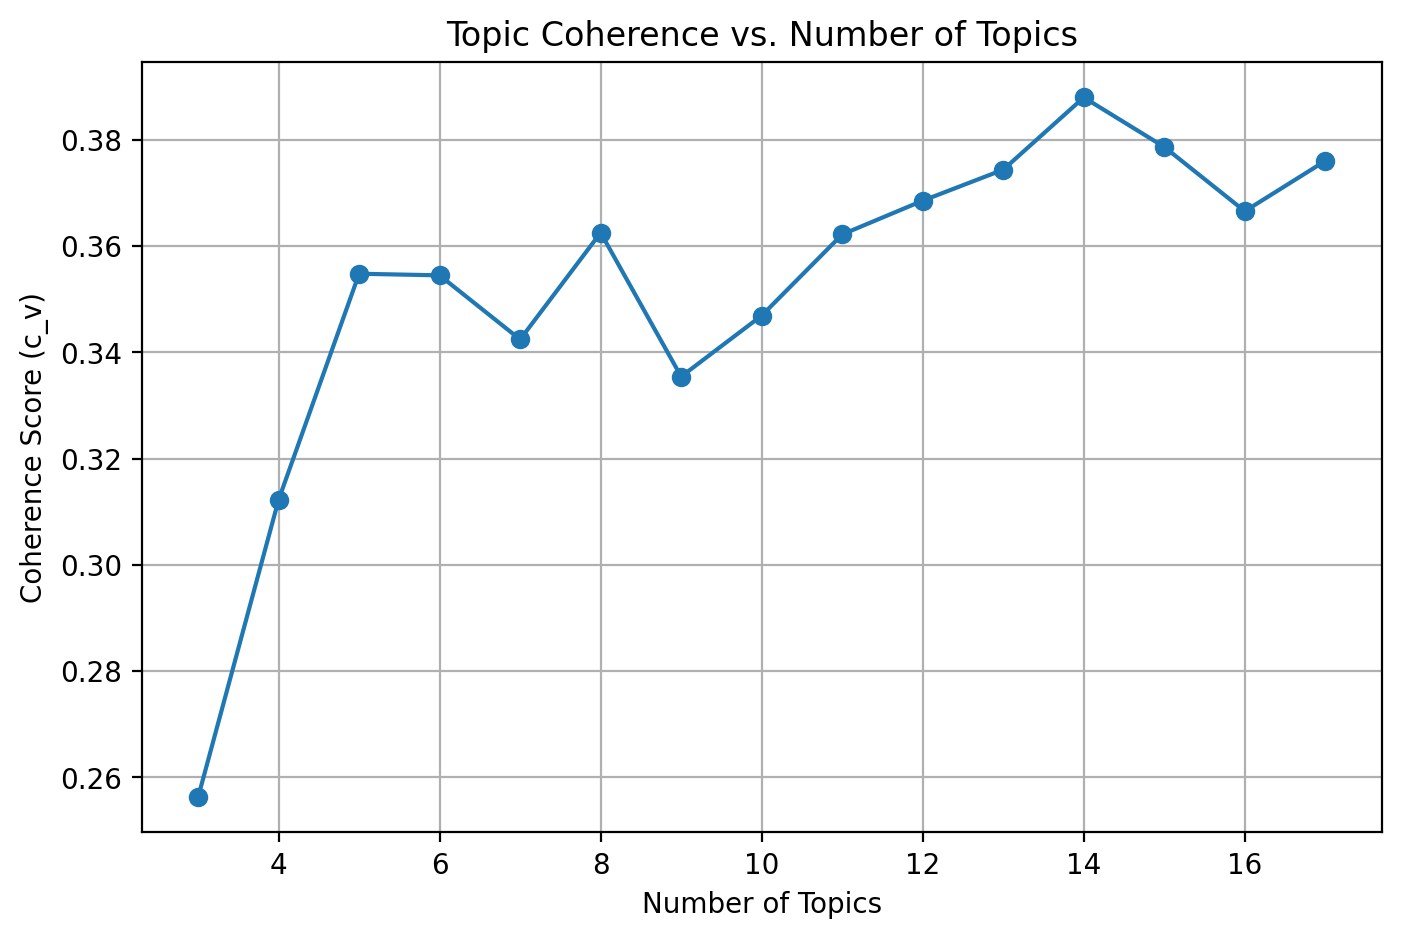

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import MmCorpus
from gensim.models.coherencemodel import CoherenceModel

corpus_bow_recipes = MmCorpus("recipes_bow.mm")

# Define different topic numbers to test
n_topics = range(3, 18)
coherence_scores = []
lda_models = []

# Iterate over each topic count
for num_topics in n_topics:
    print(f"Training LDA model with {num_topics} topics...")

    # Train LDA model
    ldag = LdaModel(corpus = recipes_bow, id2word = D_recipes, num_topics = num_topics, passes = 10, random_state = 42)
    lda_models.append(ldag)

    # Compute coherence score
    coherencemodel = CoherenceModel(model = ldag, texts = grouped_corpus, dictionary = D_recipes, coherence = 'c_v')
    coherence_score = coherencemodel.get_coherence()

    # Store results
    coherence_scores.append(coherence_score)
    print(f"Coherence score for {num_topics} topics: {coherence_score:.4f}")

# Plot coherence scores
plt.figure(figsize=(8, 5))
plt.plot(n_topics, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Topic Coherence vs. Number of Topics")
plt.grid(True)
plt.show()

# save the model with the highest coherence
highest_idx = np.argmax(coherence_scores)
lda_models[highest_idx].save("lda_recipe_grouped_reviews.gensim")

To load a previously trained LDA model.

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora import MmCorpus

# Load BOW corpus
corpus_bow_recipes = MmCorpus("recipes_bow.mm")

# Load model
ldag = LdaModel.load("lda_recipe_grouped_reviews.gensim")

Let's take a look at the top 10 terms of the topics.

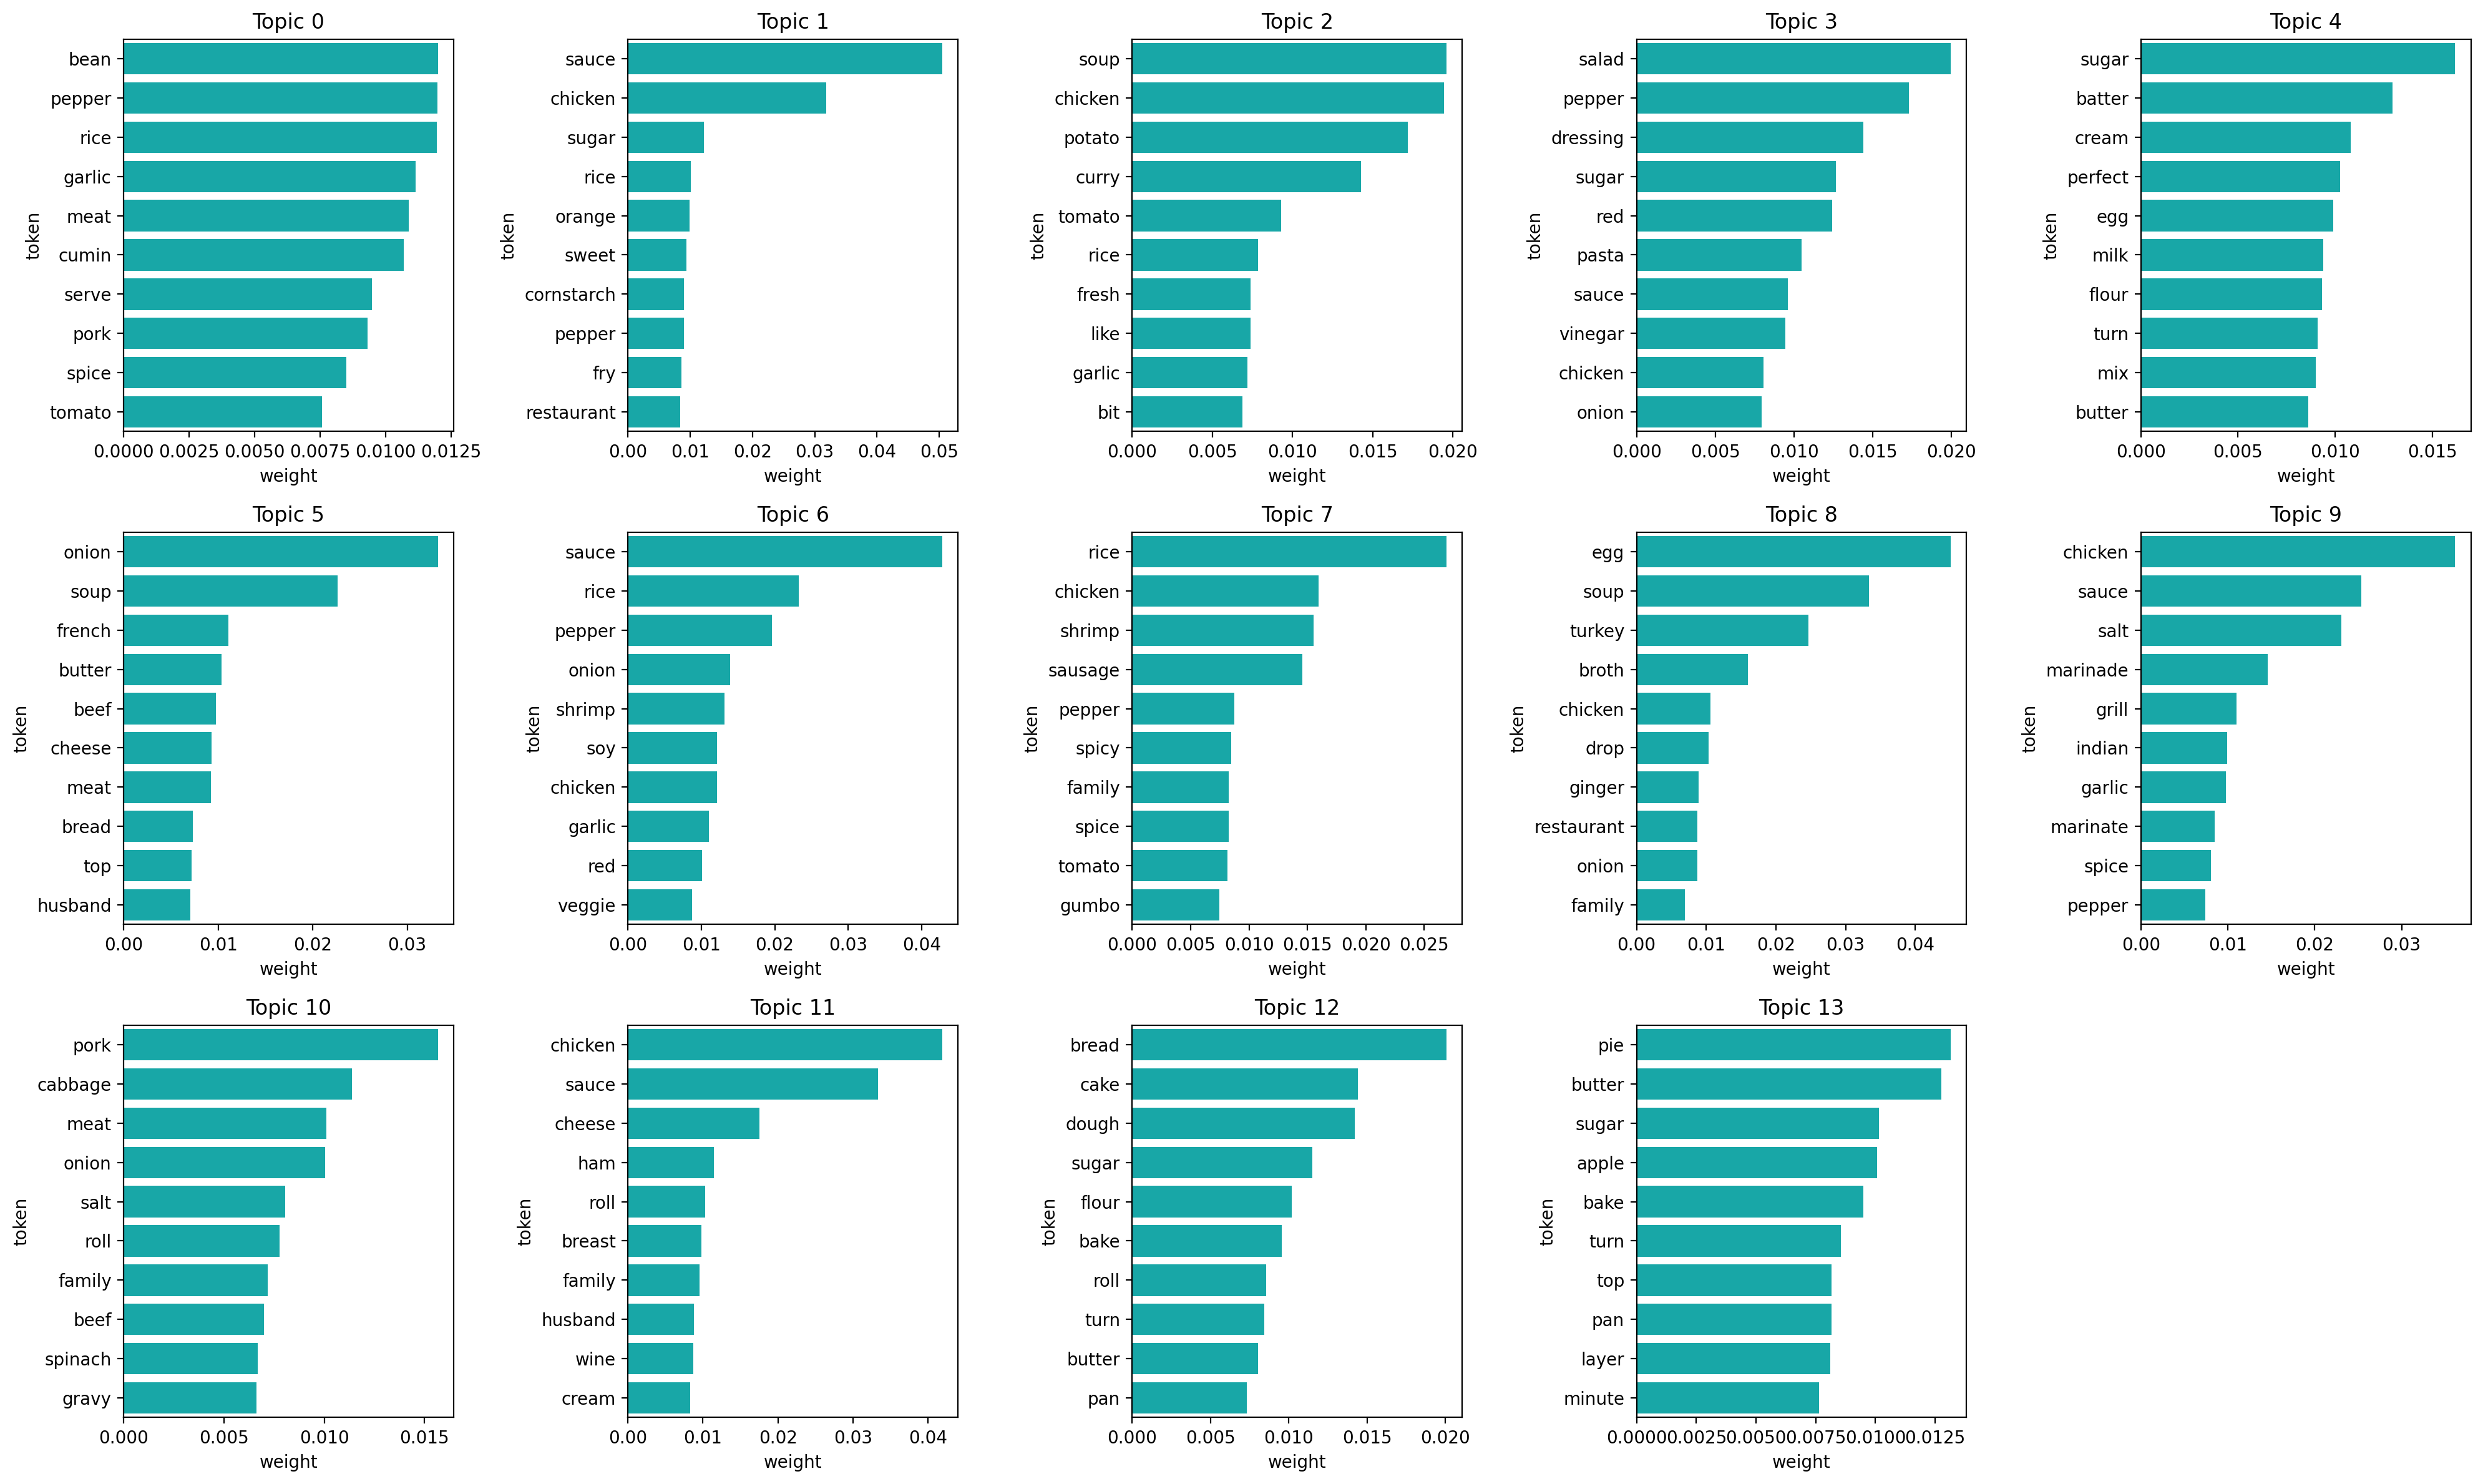

In [ ]:
import math

topn = 10
num_topics = ldag.num_topics

cols = 5
rows = math.ceil(num_topics / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, 4 * rows), sharex=False)
axes = axes.flatten()

for i in range(num_topics):
    df = pd.DataFrame(ldag.show_topic(i, topn=topn), columns=["token", "weight"])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[i])
    axes[i].set_title(f'Topic {i}')

for j in range(num_topics, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Visualize better with `pyLDAvis`.

In [ ]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

vis_data = gensimvis.prepare(ldag, corpus_bow_recipes, D_recipes)
pyLDAvis.display(vis_data)

Load `recipe_df.csv` which contains the metadata about each recipe.

In [ ]:
# Load information about the recipes
recipes_df = pd.read_csv('recipe_df.csv')
recipes_df.head()

recipe_id                                      Title              Cuisine  \
0          1           Cheesy Amish Breakfast Casserole  Amish and Mennonite   
1          2                      Best Vinegar Coleslaw  Amish and Mennonite   
2          3  Pennsylvania-Dutch Pickled Beets and Eggs  Amish and Mennonite   
3          4                       Amish Macaroni Salad  Amish and Mennonite   
4          5             Amish Friendship Bread Starter  Amish and Mennonite   

  prep_time cook_time       total_time servings  calories  fat carbs protein  
0   10 mins   55 mins     1 hr 15 mins       12     314.0  23g   12g     22g  
1   15 mins    5 mins          20 mins        8     224.0   9g   35g      2g  
2   15 mins   30 mins   2 days 45 mins        8     252.0   5g   45g      7g  
3   15 mins   10 mins     1 hr 25 mins        6     532.0  25g   66g      9g  
4   30 mins       NaN  10 days 40 mins      120      34.0   0g    8g      1g

#### Topics Analysis

To get a better idea of the meaning of each topic, we can look at the recipes that influence each topic the most.

In [ ]:
def most_relevant_recipes(ldag, topicid, corpus_bow, ndocs = 10):
    """This function returns the most relevant documents in corpus_bow

    : ldag: The trained topic model object provided by gensim
    : topicid: The topic for which we want to find the most relevant documents
    : corpus_bow: The BoW representation of documents in Gensim format
    : ndocs: Number of most relevant documents to return

    : Returns: A list with the identifiers of the most relevant documents
    """
    # Create list to return
    most_relevant_recipes = []
    print('Topic composition is:')
    items = [word for word, weight in ldag.show_topic(topicid)]
    print(items)
    # print(ldag.show_topic(topicid))

    # Compute topic weight for each document and sort by relevance
    sorted_docs = sorted(
        ((i, dict(ldag[doc]).get(topicid, 0)) for i, doc in enumerate(corpus_bow)),
        key=lambda x: x[1],
        reverse=True
    )

    # Extract top document IDs
    most_relevant_recipes = [doc_id for doc_id, _ in sorted_docs[:ndocs]]
    return most_relevant_recipes

Call the function `most_relevant_recipes` to obtain the 3 most relevant recipes for all the topics.

In [ ]:
nrecipes = 3

# Print titles of selected recipes and the cuisine it belongs to
for topic_id in range(num_topics):
    print(f"\nTopic {topic_id}:")

    recipe_ids = most_relevant_recipes(ldag, topic_id, recipes_bow, ndocs = nrecipes)

    for id in recipe_ids:

        recipe_id = grouped_reviews_df.iloc[id]['recipe_id']
        title= grouped_reviews_df[grouped_reviews_df['recipe_id'] == recipe_id]['recipe'].values[0]
        cuisine= recipes_df[recipes_df['recipe_id'] == recipe_id]['Cuisine'].values[0]
        print('-', "Recipe:", title, " - Cuisine: ", cuisine)


Topic 0:
Topic composition is:
['bean', 'pepper', 'rice', 'garlic', 'meat', 'cumin', 'serve', 'pork', 'spice', 'tomato']
- Recipe: Cuban Picadillo  - Cuisine:  Cuban
- Recipe: Cuban Ropa Vieja  - Cuisine:  Cuban
- Recipe: Classic Cuban-Style Picadillo  - Cuisine:  Cuban

Topic 1:
Topic composition is:
['sauce', 'chicken', 'sugar', 'rice', 'orange', 'sweet', 'cornstarch', 'pepper', 'fry', 'restaurant']
- Recipe: General Tso's Chicken  - Cuisine:  Chinese
- Recipe: Crispy Orange Beef  - Cuisine:  Chinese
- Recipe: Orange Chicken  - Cuisine:  Chinese

Topic 2:
Topic composition is:
['soup', 'chicken', 'potato', 'curry', 'tomato', 'rice', 'fresh', 'like', 'garlic', 'bit']
- Recipe: Mulligatawny Soup  - Cuisine:  Indian
- Recipe: Lemon Chicken Orzo Soup  - Cuisine:  Greek
- Recipe: Chicken Bhuna  - Cuisine:  Indian

Topic 3:
Topic composition is:
['salad', 'pepper', 'dressing', 'sugar', 'red', 'pasta', 'sauce', 'vinegar', 'chicken', 'onion']
- Recipe: Absolutely Fabulous Greek Salad Dressi

We can observe that there are topics related to a given Cuisine (Chinese, French, Cuban, Greek), some are related to a given product (soup, salad, bread/dough, desserts), one more to a cooking technique (marinade).

## Recommender System

We calculated the vector representation for the recipes in two ways:

- An embedding per recipe, obtained by joining all tokens of its reviews and then vectorized with FastText.

- An embedding per review, accessible in the dataset `recipe_reviews_embeddings.csv`. Using this, we  compute a weighted average of embedding per recipe by TF-IDF.

The results obtained were similar, therefore we present in this notebook only the first method. Concerning the second one, the implementation can be found in Notebook 'MLA Project_RS.ipynb'.



### Recipe embeddings and data preparation

#### Get `embedding`



Create embeddings for the first option, whose reviews per recipe are already joined, accessible in the dataset `recipe_reviews_grouped.csv`. Since in Topic Modeling the dictionary and corpus have already been created and saved, we simply need to load the two of them, which are the only information required for the word vector model.

FastText is chosen since in Text Vectorization, it has obtained the best performance.

Note: Skip the following cells and onlyrun the last to skip embedding creation.

In [ ]:
# Load data
grouped_reviews_df = pd.read_csv('recipe_reviews_grouped.csv')
grouped_reviews_df['filtered_nltk_lemmas'] = grouped_reviews_df['filtered_nltk_lemmas'].apply(ast.literal_eval)
grouped_reviews_df['filtered_nltk_lemmas'].head()

0    [recipe, long, time, post, stand, adaptable, cut, recipe, half, make, pan, add, particular, order, mince, jalapeno, drained, rotel, tomato, chili, green, pepper, red, pepper, turkey, sausage, hot, sausage, bacon, various, cheese, regular, depend, hand, please, note, add, list, possible, addition, hand, halve, recipe, enthusiastic, addition, use, egg, use, package, hash_brown, place, plain, hash_brown, suggestion, thing, find, cheese, replace, cottage_cheese, essential, creaminess, time, make, casserole, edible, good, usual, make, sunday, morning, cut, leftover, square, refrigerate, freeze, eat, week, addition, allrecipes, fabulous, things, use, crumbled, bacon, costco, use, use, dozen, fresh, egg, small, like, thick, fluffy, come, fry, bacon, onion, add, frozen, ...]
1                          [rate, recipe, star, base, make, write, make, adjust, amount, cooking, ingredient, adjustment, work, first, make, dress, day, plan, serve, slaw, second, halve, dry, ingredient, celery, salt, third, use, cup, vinegar, mixed, acv, white, vinegar, fourth, use, cup, veg, oil, fifth, add, prepared, mustard, tasting, personal_preference, cook, dressing, veg, let, cool, refrigerate, dressing, overnight, used, bag, slaw, mix, dressed, slaw, afternoon, serve, dinner, way, favorite, cole_slaw, coleslaw, recipe, house, call, week, slaw, eat, last, fridge, week, cut, sugar, half, pour, shredded, cabbage, onion, stir, boil, rest, ingredient, pour, cabbage, mix, use, cider_vinegar, eliminate, mustard, add, time, let_sit, several, hour, overnight, fridge, ...]
2                                                                                         [eggs, good, add, sugar, 2nd, time, let, eggs, sit, min, boiled, water, boil, min, cool, peel, peeling, recipe, use, egg, add, beet, depend, egg, size, pa, dutch, dad, yr_old, say, onion, intrigue, love, beet, thing, pickle, egg, turn, beautiful, color, huge_fan, clove, work, recipe, halve, quantity, onion, mine, thin, slice, chop, boil, beet, finish, second, time, recipe, add, chili, flake, couple, clove, garlic, sorry, traditionalist, dutch, grandma, cringe, brine, turn, yummy, wait, day, find, wonderful, recipe, look, something, beet, farmer_market, love, cut, sugar, tbsp, add, tbsp, organic, honey, boil, beet, use, love, forward, sister, chef, make, time, close, recipe, mom, ...]
3                                                                [make, version, today, ingredient, celery_seed, add, dry, dill, parsley, chive, cut, sugar, cup, right, balance, tart, sweet, husband, issue, swallow, able, handle, good, small, cut, vegetable, add, small, cubed, marble, cheddar, cheese, lover, new, family, favorite, loved, salad, cut, sugar, c, perfect, omit, hard, boil, egg, fan, add, shredded, cheddar, cheese, cucumber, peel, slice, use, dressing, coat, salad, save, rest, case, need, day, hubby, finish, enjoy, recipe, excellent, potential, make, tweak, read_review, make, instinct, good, cup, miracle_whip, seem, use, cup, use, cup, cup, sugar, seem, use, cup, cup, time, excellent, crunch, visual, appeal, decide, cook, noodle, use, rotini, spiral, add, ...]
4                                  [make, stink, age, follow, advice, reviewer, cover, plastic, bowl, paper_towel, use, wooden_spoon, stir, recipe, day, mixture, stop, bubble, use, flour, hand, wonder, make, know, smell, bad, rancid, smell, bad, bacteria, take, hold, realize, compost, share, recipe, friend, search, someone, give, starter, year, recipe, misplace, last, time, add, yeast, start, whole_wheat, flour, add, water, thin, countless, way, enjoy, amish_friendship, bread, good, make, bread, long, time, start, make, cupcake, pan, store, freeze, eat, add, chocolate_chip, cup, cup, walnut, favorite, add, craisins, cup, chop, pecan, everyone, love, freeze, starter, last, week, everyone, state, start, quit, throw, waste, love, muffin, everyone, share, express, sandy, ...]
Name: filtered_nltk_lemmas, dtype: object

In [ ]:
from gensim.corpora import Dictionary

D_recipes = Dictionary.load('recipes_dictionary.dict')
GroupedIterCorpus = IterableCorpus_fromfile('recipes_corpus.txt')

In [ ]:
from gensim.models import FastText

model_fasttext_g = FastText(sentences = GroupedIterCorpus, vector_size = 300, window = 5, min_count = 20, sg = 1, seed = 42, workers = 4, epochs = 5)

In [ ]:
from gensim.models import KeyedVectors
import gc

g_fasttext_wv = model_fasttext_g.wv
g_fasttext_wv.save("model_fastText_grouped.wordvectors")

del model_fasttext_g
gc.collect()

0

In [ ]:
from gensim.models import KeyedVectors

g_fasttext_wv = KeyedVectors.load("model_fastText_grouped.wordvectors", mmap='r')

In [ ]:
# Check results
print('============= FastText vocabulary =============')
words = list(g_fasttext_wv.key_to_index)
print(len(words))
print(words[99:130])

============= FastText vocabulary =============
4124
['heat', 'share', 'powder', 'amazing', 'roll', 'oven', 'veggie', 'less', 'hand', 'side', 'suggest', 'know', 'beef', 'call', 'substitute', 'food', 'cayenne', 'broth', 'mixture', 'star', 'year', 'pork', 'reviewer', 'write', 'review', 'used', 'salad', 'small', 'let', 'leftover', 'kid']


In [ ]:
g_fT_coverage = get_vocabulary_coverage(g_fasttext_wv, D_recipes)
print("Coverage {0:.4f}".format(g_fT_coverage))

g_reviews_fT = np.array(
		grouped_reviews_df['filtered_nltk_lemmas'].swifter.apply(lambda r: get_review_vector(g_fasttext_wv, r)).tolist()
)
g_reviews_fT_csr = csr_matrix(g_reviews_fT)

Coverage 1.0000


Pandas Apply:   0%|          | 0/824 [00:00<?, ?it/s]

In [ ]:
g_reviews_fT_array = g_reviews_fT_csr.toarray()
grouped_reviews_df['embedding'] = [vec.tolist() for vec in g_reviews_fT_array]
grouped_reviews_df['embedding'].head()

0    [0.1193402037024498, -0.06337232887744904, -0.015847401693463326, 0.10174857079982758, 0.0945461317896843, 0.02286396734416485, -0.024223942309617996, 0.017570653930306435, -0.06487810611724854, -0.06366068124771118, 0.046743158251047134, -0.053152892738580704, -0.019295716658234596, 0.013874761760234833, 0.03225760534405708, -0.03243790939450264, -0.01925870031118393, -0.12905177474021912, 0.054721660912036896, -0.04703583940863609, 0.11593519151210785, -0.04118784889578819, 0.04296635836362839, 0.02033000998198986, 0.04296901077032089, 0.03714046999812126, 0.05047149583697319, 0.05518931522965431, -0.012281641364097595, -0.007210804149508476, -0.05641563609242439, 0.0053604827262461185, -0.040712155401706696, -0.045395780354738235, 0.002853143261745572, -0.11615104228258133, -0.07636929303407669, 0.16084972023963928, -0.059159647673368454, 0.17679953575134277, 0.025722745805978775, 0.02130274847149849, 0.06539960950613022, -0.056570615619421005, 0.049452345818281174, 0.06855803728103638, 0.05955253168940544, 0.020162034779787064, 0.061986152082681656, 0.03837200254201889, -0.0008496349910274148, -0.03799140080809593, -0.10005959123373032, 0.06785612553358078, 0.039468929171562195, 0.12329307943582535, -0.019858337938785553, -0.11879140883684158, -0.07294745743274689, 0.013466150499880314, -0.03926486149430275, 0.19372107088565826, -0.0655357837677002, 0.0018084507901221514, -0.08249268680810928, 0.052519816905260086, 0.06355120241641998, -0.07376278936862946, -0.039686501026153564, -0.0061898245476186275, 0.09474331140518188, -0.047643858939409256, 0.031087258830666542, -0.010647095739841461, -0.038520459085702896, 0.07499728351831436, 0.05404428020119667, 0.04247945919632912, 0.0657680481672287, 0.10171105712652206, -0.03564924746751785, 0.17058376967906952, 0.0014374169986695051, -0.008116242475807667, 0.1047065407037735, -0.06600769609212875, -0.020330503582954407, 0.16300104558467865, 0.028794974088668823, -0.04122136905789375, 0.07376722991466522, 0.0006464695907197893, 0.16769756376743317, 0.024001967161893845, 0.00466140266507864, -0.026206882670521736, 0.0921214148402214, 0.15859578549861908, 0.11165802925825119, -0.015394111163914204, ...]
1                  [0.08636625111103058, -0.03266873583197594, -0.03906479477882385, 0.06285322457551956, 0.08702893555164337, 0.049254160374403, -0.03734007477760315, 0.03136609494686127, -0.07464209198951721, -0.08750556409358978, 0.011798543855547905, -0.030366763472557068, 0.007462873589247465, 0.021924838423728943, 0.0272245891392231, -0.016738109290599823, -0.03514587879180908, -0.15329515933990479, 0.036648549139499664, -0.07177723199129105, 0.09417283535003662, -0.04825485125184059, 0.06933198869228363, 0.04585002735257149, 0.04778217151761055, 0.05790971592068672, 0.049391668289899826, 0.040310945361852646, -0.006048198789358139, -0.010665317066013813, -0.03830558806657791, -0.013555283658206463, -0.0053567299619317055, 0.010002011433243752, 0.012678384780883789, -0.10961366444826126, -0.03808770701289177, 0.12964504957199097, -0.03474092110991478, 0.15468798577785492, 0.01765979453921318, -0.001076224958524108, 0.053153280168771744, -0.05508379265666008, 0.01368480734527111, 0.055816419422626495, 0.026483140885829926, 0.04799095168709755, 0.06709663569927216, 0.03496871516108513, 0.00647989846765995, -0.06171770766377449, -0.12419027835130692, 0.06333072483539581, 0.054678138345479965, 0.11428921669721603, 0.028526633977890015, -0.079755499958992, -0.09838075190782547, 0.023543884977698326, -0.018454376608133316, 0.19710254669189453, -0.05175462365150452, 0.009741920977830887, -0.10976605862379074, 0.03977685794234276, 0.09071709215641022, -0.049895208328962326, -0.06026804819703102, 0.0050720530562102795, 0.07806090265512466, -0.06826882809400558, -0.014245925471186638, -0.04184452444314957, 0.00325993774458766, 0.05149855464696884, 0.06962045282125473, 0.038283754140138626, 0.08875653892755508, 0.043612219393253326, -0.03776282072067261, 0.13822273910045624, 0.012

Save the embeddings per recipe to a new csv file.

In [ ]:
grouped_reviews_df.to_csv('recipes_embeddings.csv')

#### Data prep

In [ ]:
from gensim.corpora import Dictionary, MmCorpus

D_recipes = Dictionary.load("recipes_dictionary.dict")
corpus_bow_recipes = MmCorpus("recipes_bow.mm")

# Recover the corpus
corpus_recipes = [[D_recipes[id] for id, _ in doc] for doc in corpus_bow_recipes]

# Convert to plain list to recover original bow, to be used in some methods instead of the MmCorpus object
recipes_bow = list(corpus_bow_recipes)

In [ ]:
# embedding per review

reviews_df = pd.read_csv('recipe_reviews_embeddings.csv')
reviews_df['embedding'] = reviews_df['embedding'].apply(ast.literal_eval)

In [ ]:
# embedding per recipe
grouped_reviews_df = pd.read_csv('recipes_embeddings.csv')
grouped_reviews_df['embedding'] = grouped_reviews_df['embedding'].apply(ast.literal_eval)
grouped_reviews_df = grouped_reviews_df[['recipe_id', 'recipe', 'filtered_nltk_lemmas', 'embedding']]
len(grouped_reviews_df.iloc[0]['embedding'])

300

In [ ]:
# check for duplicated recipes and drop if needed
duplicated_rows = grouped_reviews_df[grouped_reviews_df['recipe'].duplicated(keep=False)]['recipe_id']
print(duplicated_rows)

grouped_reviews_df = grouped_reviews_df.drop_duplicates(subset='recipe', keep='first')

516    553
534    574
Name: recipe_id, dtype: int64


Visualize distribution of ratings.

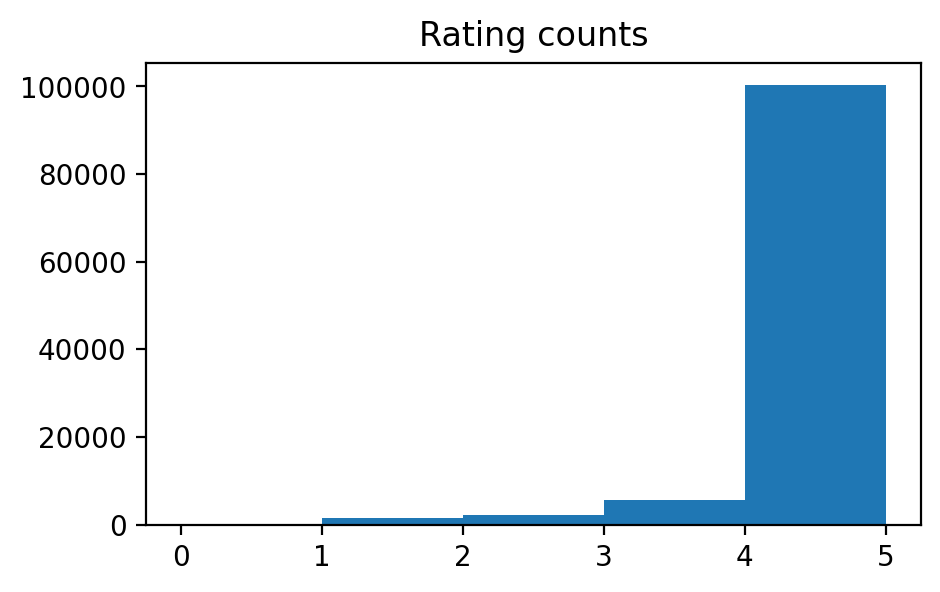

In [ ]:
plt.figure(figsize = (5,3))
plt.hist(reviews_df['rating'], range = (0,5), bins = 5)
plt.title("Rating counts")
plt.show()

Visualize distribution of reviews per user.

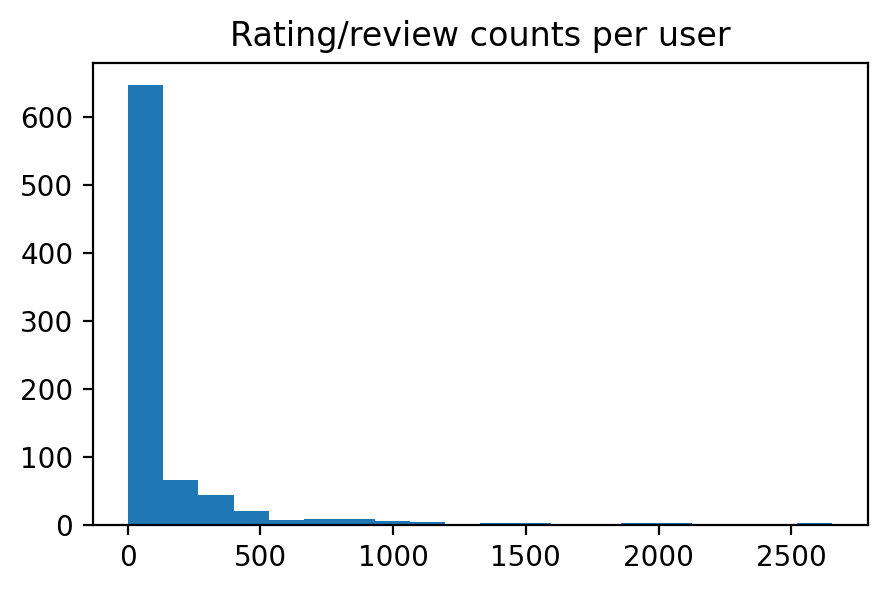

In [ ]:
plt.figure(figsize = (5,3))
plt.hist(reviews_df['recipe_id'].value_counts(), bins = 20)
plt.title("Rating/review counts per user")
plt.show()

In [ ]:
reviews_user = reviews_df['user'].value_counts()
max_reviews = reviews_user.max()
print("Max reviews: ", max_reviews)
# Minimum number of reviews by a single user
min_reviews = reviews_user.min()
print("Min reviews: ", min_reviews)

Max reviews:  6543
Min reviews:  1


In [ ]:
reviews_df.groupby('user').size().reset_index(name='review_count').sort_values('review_count', ascending = False).head(5)

user  review_count
3309   Anonymous          6543
22092   Jennifer           126
30102       Lisa           113
25352      Karen           102
26951        Kim           100

Each user only has a few number of reviews given, so user-based is not an option. However, our goal is to provide identifiable users with recommended recipes, so we will need to keep them. Anonymous users should be removed.

For a better analysis, we will create a dataframe for the users.

In [ ]:
# Remove all rows where user is: Anonymous
reviews_df = reviews_df[reviews_df['user'] != 'Anonymous']

In [ ]:
user_df = pd.DataFrame({'user': reviews_df['user'].unique()})
user_df['user_id'] = range(len(user_df))
user_df = user_df[['user_id', 'user']]

In [ ]:
# Merge reviews_df with user_df to get user_id attached to each review
df = reviews_df.merge(user_df, on='user', how='left')

# Select only the needed columns
ratings_df = df[['user_id', 'recipe_id', 'rating']]


Find `user` and `recipe_id` that are above a threshold to be kept.

In [ ]:
# Users with at least 5 reviews
users_min_reviews = ratings_df['user_id'].value_counts()
users_min_reviews = users_min_reviews[users_min_reviews >= min_reviews].index

# Recipes with at least 5 reviews
recipes_min_reviews = ratings_df['recipe_id'].value_counts()
recipes_min_reviews = recipes_min_reviews[recipes_min_reviews >= min_reviews].index

Remove recipes from `grouped_reviews_df` that have too little reviews.

In [ ]:
grouped_reviews_df = grouped_reviews_df[grouped_reviews_df['recipe_id'].isin(recipes_min_reviews)]

In [ ]:
# Upload information about the recipes
recipes_df = pd.read_csv('recipes_with_reviews.csv')

In [ ]:
# Recalculate the datasets
filtered_ratings_df = ratings_df[
    (ratings_df['user_id'].isin(users_min_reviews)) &
    (ratings_df['recipe_id'].isin(recipes_min_reviews))
]

filtered_user_df = user_df[user_df['user_id'].isin(users_min_reviews)]
filtered_recipe_df = recipes_df[recipes_df['recipe_id'].isin(recipes_min_reviews)]

In [ ]:
#Getting rid off users and recipes with less than 5 reviews
user_counts = filtered_ratings_df['user_id'].value_counts()
users_with_enough_reviews = user_counts[user_counts > 5].index
filtered_ratings_df = filtered_ratings_df[filtered_ratings_df['user_id'].isin(users_with_enough_reviews)]

recipe_counts = filtered_ratings_df['recipe_id'].value_counts()
recipes_with_enough_reviews = recipe_counts[recipe_counts > 5].index
filtered_ratings_df = filtered_ratings_df[filtered_ratings_df['recipe_id'].isin(recipes_with_enough_reviews)]

In [ ]:
# Create mapping from recipe_id to row index in similarity_matrix, otherwise error when recovering matching item fo a given similarity
# when giving recommendations for a user
recipe_id_to_index = {r_id: idx for idx, r_id in enumerate(grouped_reviews_df['recipe_id'])}

In [ ]:
# Create the reverse mapping
index_to_recipe_id = {idx: r_id for r_id, idx in recipe_id_to_index.items()}

In [ ]:
# Choose a user (20 has reviews that are not all 5 stars)
userId = 20

ratings_userId = filtered_ratings_df.loc[filtered_ratings_df['user_id'] == userId]
ratings_userId.sort_values(ascending=False,by=['rating'])

user_id  recipe_id  rating
20          20          1       5
26109       20        306       5
61585       20        683       5
98501       20        882       5
11487       20        189       4
20292       20        271       4
29228       20        310       3
34357       20        364       3
55222       20        577       3
69320       20        705       3
94665       20        878       3
96189       20        879       2

In [ ]:
# Recover the recipes that the user liked more, to be used later on to produce recommendations.
min_stars=4
filtered = ratings_userId[ratings_userId['rating'] >= min_stars]

# Sort by rating descending, then by original index to preserve order
filtered = filtered.sort_values(by='rating', ascending=False)

# Drop duplicates, if any
recipes_liked = filtered.drop_duplicates(subset='recipe_id')['recipe_id'].tolist()

### Popularity RS

Use the Weighted Rating formula (from IMDB, seen in Recommender System Notebook).

In [ ]:
# Define the minimum number of ratings by recipe for a recipe to be considered
m = 10

# Define number of Top recipes to recover
M = 50

# Calculate the mean rating for all recipes
C = filtered_ratings_df['rating'].mean()

# Group to get R and v for each recipe
stats_df = filtered_ratings_df.groupby('recipe_id').agg(
    R=('rating', 'mean'),
    v=('rating', 'count')
).reset_index()

# Calculate WR
stats_df['WR'] = (stats_df['v'] / (stats_df['v'] + m)) * stats_df['R'] + \
                   (m / (stats_df['v'] + m)) * C

# Merge with the recipes metadata to recover the titles
recipes_popul = pd.merge(stats_df, filtered_recipe_df[['recipe_id', 'Title']], on='recipe_id')

# Sort by WR
recipes_popul = recipes_popul.sort_values(by='WR', ascending=False).head(M)

recipes_popul.head(10)

recipe_id         R    v        WR                           Title
327        826  4.970588   34  4.879856                    Easy Baklava
135        344  4.962963   27  4.857126        Canadian Pork Loin Chops
83         267  4.893939   66  4.851495     Chef John's Shrimp Étouffée
31          96  4.896552   58  4.848730                    Easy Pavlova
313        807  4.855469  256  4.844788                   Greek Baklava
77         259  4.897959   49  4.842604       Cajun Seasoning Spice Mix
256        692  4.925926   27  4.830099       Chef John's Crème Fraîche
101        291  4.925926   27  4.830099                    Cajun Shrimp
21          61  4.923077   26  4.825379   Chef John's Chimichurri Sauce
5            6  4.831461  178  4.817626  My Amish Friend's Caramel Corn

In [ ]:
# Store results for Dashboard implementation.
recipes_popul.to_csv('Top_50_all_cols.csv', index=False)

In [ ]:
# Store results for Dashboard implementation.
recipes_popul.to_pickle('Top_50.pkl')

### Content-based RS

#### Similarity based version

Compute similarity between recipes based on its embedding. Use of Cosine Similarity metric to capture how aligned is the content of two given recipes, without considering the magnitude of each of their vector representation, only their direction in the embedding space.  

In [ ]:
# Once we have the WE for the filtered recipes, we calculate the similarities to create the similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(list(grouped_reviews_df['embedding']))

In [ ]:
top_n = 3

for recipe_id in recipes_liked:
    if recipe_id not in recipe_id_to_index:
        print(f"Recipe {recipe_id} not in similarity matrix — skipping.")
        continue

    idx = recipe_id_to_index[recipe_id]

    # Print title
    title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == recipe_id, 'Title'].values[0]
    print('\nRecommended recipes similar to ' + title + ':')

    # Get sorted indices of most similar recipes
    similar_indices = np.argsort(similarity_matrix[idx])[::-1]
    # print(idx, "similar: ", similar_indices)
    # Exclude itself (first entry) and take tpo_n
    similar_indices = [i for i in similar_indices if i != idx][:top_n]

    # print("Selected top 3: ", similar_indices)

    for sim_idx in similar_indices:
        similar_recipe_id = index_to_recipe_id[sim_idx]
        # print('similar idx: ', sim_idx, 'mapped id: ', similar_recipe_id)
        similar_title = filtered_recipe_df.loc[filtered_recipe_df['recipe_id'] == similar_recipe_id, 'Title'].values[0]
        sim_score = similarity_matrix[idx][sim_idx]
        # print(f'  - {similar_recipe_id} {similar_title} (Similarity: {sim_score:.3f})')
        print(f'  - {similar_title} (Similarity: {sim_score:.3f})')



Recommended recipes similar to Cheesy Amish Breakfast Casserole:
  - Christmas Brunch Casserole (Similarity: 0.997)
  - Bierock Casserole (Similarity: 0.983)
  - Amish Casserole (Similarity: 0.982)

Recommended recipes similar to Creamy Cajun Chicken Pasta:
  - Cajun Chicken Pasta (Similarity: 0.999)
  - Cajun Seafood Pasta (Similarity: 0.994)
  - Crawfish Fettuccine I (Similarity: 0.990)

Recommended recipes similar to Basic Crêpes:
  - Real French Crêpes (Similarity: 0.995)
  - French Crêpes (Similarity: 0.994)
  - Dessert Crepes (Similarity: 0.992)

Recommended recipes similar to Mulligatawny Soup:
  - Creamy Cajun Chicken Pasta (Similarity: 0.987)
  - Indian Chicken Curry (Similarity: 0.986)
  - Greek Lemon Chicken Soup (Similarity: 0.986)

Recommended recipes similar to Brazilian Chicken with Coconut Milk:
  - Jamaican Style Curry Chicken (Similarity: 0.992)
  - Indian Chicken Curry (Similarity: 0.992)
  - Brazilian Fish Stew (Similarity: 0.992)

Recommended recipes similar to Co

In [ ]:
# Ratings, function to calculate r_u_i for a user u and a recipe i

def estimate_rating(user_ratings, target_recipe_id, similarity_matrix, recipe_id_to_index, K=5):
    if target_recipe_id not in recipe_id_to_index:
        return None

    i = recipe_id_to_index[target_recipe_id]

    # Build list of (other_recipe_id, similarity) pairs
    similarities = []
    for rated_recipe_id in user_ratings:
        if rated_recipe_id in recipe_id_to_index:
            j = recipe_id_to_index[rated_recipe_id]
            sim_ij = similarity_matrix[i][j]
            similarities.append((rated_recipe_id, sim_ij))

    # Sort by similarity and take top-K
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[:K]

    numerator = 0
    denominator = 0
    for recipe_j, sim_ij in similarities:
        rating_uj = user_ratings[recipe_j]
        numerator += sim_ij * rating_uj
        denominator += sim_ij

    if denominator == 0:
        return None

    return numerator / denominator # round(numerator / denominator)


In [ ]:
# Select ratings by user 20
user_ratings_ = filtered_ratings_df[filtered_ratings_df['user_id'] == 20][['recipe_id', 'rating']]

# Convert to dict: {recipe_id: rating}
user_ratings = dict(zip(user_ratings_['recipe_id'], user_ratings_['rating']))

# Predict rating for target recipe_id
target=100
predicted = estimate_rating(
    user_ratings=user_ratings,
    target_recipe_id=target,
    similarity_matrix=similarity_matrix,
    recipe_id_to_index=recipe_id_to_index,
    K=5
)


In [ ]:
print(f"Predicted rating for recipe {target}: {predicted}")

Predicted rating for recipe 100: 3.1927330783942014


#### Collaborative Filtering with SURPRISE version

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2461566 sha256=2f22ae598776b59974e3aee1ddfb70fd3ff5bd18468697183aa2f6b1eb844aa4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
from surprise import Reader, Dataset

reader = Reader(rating_scale = (1,5))
# ratings_df = Dataset.load_from_df(reviews_df[['user', 'recipe_id', 'rating']], reader)
ratings_dtaf = Dataset.load_from_df(filtered_ratings_df[['user_id', 'recipe_id', 'rating']], reader)

In [ ]:
import random
import copy
from surprise.model_selection.search import GridSearchCV
from surprise.prediction_algorithms import KNNBasic, KNNWithMeans, KNNWithZScore

raw_ratings = ratings_dtaf.raw_ratings
random.shuffle(raw_ratings)

thr = int(0.75 * len(raw_ratings))
trainset_raw = raw_ratings[: thr]
testset_raw = raw_ratings[thr :]

datatrain = copy.deepcopy(ratings_dtaf)
datatrain.raw_ratings = trainset_raw

In [ ]:
trainset_raw[:1]

[(10087, 489, 5.0, None)]

In [ ]:
testset_raw[:1]

[(4787, 433, 5.0, None)]

In [ ]:
len(trainset_raw)+len(testset_raw)

15757

In [ ]:
trainset = datatrain.build_full_trainset()
testset = ratings_dtaf.construct_testset(testset_raw)

In [ ]:
import json
from surprise import accuracy
import gc

k_vals = [10,20,30,40,50]

sim_options = {
    'name': 'cosine',
    'user_based': False  # item-based
}

results = {}
for k in k_vals:
    print(f"Evaluating K = {k}")
    algo = KNNBasic(k=k, sim_options=sim_options)
    algo.fit(trainset)
    preds = algo.test(testset)
    rmse = accuracy.rmse(preds, verbose=False)

    results[k] = rmse

    with open("knn_rmse_results.json", "w") as f:
        json.dump(results, f)

    del algo, preds
    gc.collect()

Evaluating K = 10
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating K = 20
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating K = 30
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating K = 40
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating K = 50
Computing the cosine similarity matrix...
Done computing similarity matrix.


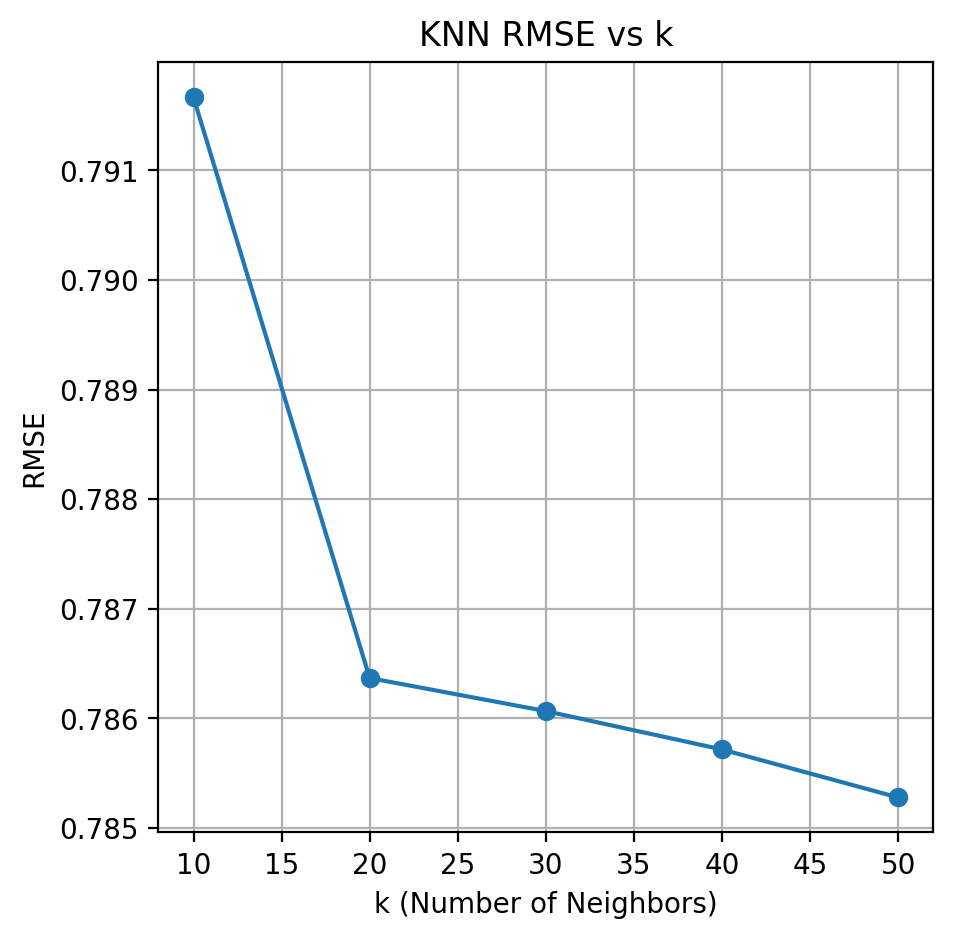

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(k_vals, [results[k] for k in k_vals], marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("RMSE")
plt.title("KNN RMSE vs k")
plt.grid(True)
plt.show()

In [ ]:
from surprise import SVD

param_grid = {'n_factors': range(1,100, 5), 'biased': [True]}

# Fijamos refit=true para que reentrene el modelo final con todo el conjunto de datos
gs_SVD = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, refit= True)
gs_SVD.fit(datatrain)

In [ ]:
# Best RMSE
print(gs_SVD.best_score['rmse'])

# Optimum parameters
print(gs_SVD.best_params['rmse'])

0.7631947123318552
{'n_factors': 1, 'biased': True}


In [ ]:
from surprise import accuracy

testset_gs = ratings_dtaf.construct_testset(testset_raw)
predictions = gs_SVD.test(testset_gs)
RMSE_SVD = accuracy.rmse(predictions)
MAE_SVD = accuracy.mae(predictions)

RMSE: 0.7318
MAE:  0.5383


In [ ]:
param_grid = {'k': range(10, 50, 10),
							'min_k': range(1, 10),
							'sim_options': {'name': ['cosine'], 'user_based': [False]}}

gs_KNN = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, refit = True)
gs_KNN.fit(datatrain)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
# Best RMSE
print(gs_KNN.best_score['rmse'])

# Optimum parameters
print(gs_KNN.best_params['rmse'])

0.7783003953539064
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [ ]:
predictions = gs_KNN.test(testset_gs)
RMSE_KNN = accuracy.rmse(predictions)
MAE_KNN = accuracy.mae(predictions)

RMSE: 0.7527
MAE:  0.5657


In [ ]:
gsWithMeans = GridSearchCV(KNNWithMeans, param_grid, measures = ['rmse'], cv = 3, refit = True)
gsWithMeans.fit(datatrain)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
# Best RMSE
print(gsWithMeans.best_score['rmse'])

# Optimum parameters
print(gsWithMeans.best_params['rmse'])

0.7814493080300428
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [ ]:
predictions = gsWithMeans.test(testset_gs)
RMSEWithMeans = accuracy.rmse(predictions)
MAEWithMeans = accuracy.mae(predictions)

RMSE: 0.7456
MAE:  0.5393


In [ ]:
gsWithZScore = GridSearchCV(KNNWithZScore, param_grid, measures = ['rmse'], cv = 3, refit = True)
gsWithZScore.fit(datatrain)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing th

In [ ]:
# Best RMSE
print(gsWithZScore.best_score['rmse'])

# Optimum parameters
print(gsWithZScore.best_params['rmse'])

0.7818373725246889
{'k': 40, 'min_k': 9, 'sim_options': {'name': 'cosine', 'user_based': False}}


In [ ]:
from surprise import accuracy

#This are done with the best result given by KNNWithZScore
testset_gs = ratings_dtaf.construct_testset(testset_raw)
predictions = gsWithZScore.test(testset_gs)
RMSEWithZScore = accuracy.rmse(predictions)
MAEWithZScore = accuracy.mae(predictions)

RMSE: 0.7466
MAE:  0.5388


If we compare all the RMSE and MAE the best result are the ones form SVD so we are going to storage this in this dictonary for later

In [ ]:
results_predictions_gs_SVD= {'RMSE': RMSE_SVD, 'MAE': MAE_SVD}

In [ ]:
# Predict rating for a single user and item (e.g. user_id=20, recipe_id=100)
uid = 20
iid = 100
pred = gs_SVD.predict(uid, iid)
print(f"Predicted rating: {pred.est}")

Predicted rating: 3.9055178273213076


# Compare models

In [ ]:
# Recover the test dateset from Surprise partition: trainset_raw and testset_raw
train_df = pd.DataFrame(trainset_raw, columns=['user_id', 'recipe_id', 'rating', 'partition'])
test_df = pd.DataFrame(testset_raw, columns=['user_id', 'recipe_id', 'rating', 'partition'])
train_df = train_df.drop(columns='partition')
test_df = test_df.drop(columns='partition')

In [ ]:
train_df.head()

user_id  recipe_id  rating
0    10087        489     5.0
1     2622         38     4.0
2    10182        189     5.0
3     2148        271     4.0
4    20228        828     5.0

In [ ]:
user_ratings_train = train_df.groupby('user_id').apply(
    lambda x: dict(zip(x['recipe_id'], x['rating']))
).to_dict()

<ipython-input-70-9bcbc6b5b52f>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_ratings_train = train_df.groupby('user_id').apply(


In [ ]:
dict(list(user_ratings_train.items())[:3])

{14: {874: 5.0, 849: 5.0, 355: 5.0, 1: 5.0, 773: 5.0, 807: 5.0},
 20: {882: 5.0,
  878: 3.0,
  310: 3.0,
  271: 4.0,
  1: 5.0,
  879: 2.0,
  364: 3.0,
  683: 5.0,
  705: 3.0,
  577: 3.0},
 21: {411: 5.0,
  4: 5.0,
  874: 5.0,
  341: 4.0,
  439: 4.0,
  669: 5.0,
  685: 4.0,
  318: 4.0,
  725: 5.0,
  424: 5.0,
  886: 1.0,
  715: 4.0,
  291: 5.0,
  256: 5.0,
  802: 5.0,
  336: 5.0,
  821: 5.0,
  61: 5.0,
  448: 4.0,
  268: 5.0}}

In [ ]:
predictions = []
K=6

for item in test_df.itertuples():
    user = item.user_id
    recipe = item.recipe_id
    actual_rating = item.rating

    if user not in user_ratings_train:
        predicted_rating = None
    else:
        predicted_rating = estimate_rating(
            user_ratings=user_ratings_train[user],
            target_recipe_id=recipe,
            similarity_matrix=similarity_matrix,
            recipe_id_to_index=recipe_id_to_index,
            K=K
        )

    predictions.append((user, recipe, actual_rating, predicted_rating))


In [ ]:
user_id = 20
user_predictions = [p for p in predictions if p[0] == user_id]
print(user_predictions)

[(20, 306, 5.0, 3.6756817106497572), (20, 189, 4.0, 3.6745116607457637)]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Filter out None predictions
filtered = [(a, p) for (_, _, a, p) in predictions if p is not None]

actual = [a for (a, p) in filtered]
predicted = [p for (a, p) in filtered]

rmse = (mean_squared_error(actual, predicted))**0.5
mae = mean_absolute_error(actual, predicted)

print(f"Neighborhood based version:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

print("\n")

print(f"Recommended version Surprise:")
print(f"RMSE: {results_predictions_gs_SVD['RMSE']}")
print(f"MAE: {results_predictions_gs_SVD['MAE']}")

Neighborhood based version:
RMSE: 0.7985
MAE: 0.5632


Recommended version Surprise:
RMSE: 0.7317704211192003
MAE: 0.538316845594616


Here we will compare the same prediction of both models

In [ ]:
def get_ratings_from_methods(uid, target):
  '''
  uid: id of the user we want to predict the rating for
  target: id of the item we want to predict the rating for
  '''
  user_ratings_ = filtered_ratings_df[filtered_ratings_df['user_id'] == uid][['recipe_id', 'rating']]

  # Convert to dict: {recipe_id: rating}
  user_ratings = dict(zip(user_ratings_['recipe_id'], user_ratings_['rating']))

  # Predict rating for target recipe_id
  predicted = estimate_rating(
      user_ratings=user_ratings,
      target_recipe_id=target,
      similarity_matrix=similarity_matrix,
      recipe_id_to_index=recipe_id_to_index,
      K=5
  )

  print(f"Predicted rating of {uid} user to {target} recipe")
  print(f"Neighborhood based version: {predicted}")

  # Predict rating for a single user and item (e.g. user_id=20, recipe_id=100)

  pred = gs_SVD.predict(uid, target)
  print(f"SURPRISE using SVD: {pred.est}")

In [ ]:
# Choose a user (21 has reviews that are all 5 stars)
userId = 21

ratings_userId = filtered_ratings_df.loc[filtered_ratings_df['user_id'] == userId]
ratings_userId.sort_values(ascending=False,by=['rating'])

user_id  recipe_id  rating
21           21          1       5
46352        21        439       5
102255       21        886       5
100842       21        886       5
94006        21        874       5
85402        21        821       5
81418        21        807       5
80353        21        802       5
76314        21        725       5
74535        21        715       5
59196        21        669       5
55795        21        582       5
954          21          4       5
54753        21        548       5
32813        21        336       5
43080        21        429       5
41616        21        424       5
1247         21          4       5
37564        21        411       5
5698         21         61       5
14173        21        256       5
19480        21        268       5
25453        21        291       5
31024        21        318       4
45618        21        439       4
49786        21        448       4
33290        21        341       4
73652        21        715       4
64763        21        685       4
55819        21        582       4
95690        21        879       3
102748       21        886       1

As you can remember user 20 had reviews that were not always 5 stars making its predictions more diffucult. That's why the predictions are so different. However, for users such as 21 who has reviews that are always 5 stars its predictions are more similar.

In [ ]:
get_ratings_from_methods(20, 100)
print("\n")
get_ratings_from_methods(21, 100)

Predicted rating of 20 user to 100 recipe
Neighborhood based version: 3.1927330783942014
SURPRISE using SVD: 3.9055178273213076


Predicted rating of 21 user to 100 recipe
Neighborhood based version: 4.196029284339703
SURPRISE using SVD: 4.472900786740111
